# DOPP Ex 2 - Question 28 - Food in the EU

## Group 04
- #### Anna Laczkó: 12347556
- #### Ghazal Arzanian: 
- #### Bosse Behrens: 12347333
- #### Marcell Szekrenyes: 12347300

## 1. Introduction


Food is a vital part of culture, health, and the economy, making it an essential area of study. This project focuses on understanding food consumption and trade across Europe, examining how these areas are interconnected and how they influence our lives on multiple levels, from individual well-being to national economic performance. By investigating these relationships, we aim to uncover patterns and insights that shed light on the broader implications of food systems in Europe. Guided by the assignment's broader questions on this topic, we refined our focus to explore specific, well-defined questions. These questions are designed to help us dive deeper into how food consumption varies across regions, the role of trade in shaping these patterns, and the ways in which health and economic indicators are relatedd.

#### Our investigation is centered around the following key questions:

1. What are differences and similarities in food consumption/diets across European countries and regions?

2. What types of foods are mainly exported/imported in a specific country?

3. How import and export will change over time for each country?

4. Relationships between food consumption and health:
    - Is there a relationship between life expectancy and food consumption?
    - Is there a relationship between the prevalence of diabetes and food consumption?
    - Is there a relationship between the obesity rate and food consumption?

5. Relationships between food consumption and economic indicators:
    - Is there a relationship between the amount and types of food exported/imported and food consumption?
    - Is there a relationship between the GDP per capita and food consumption?
    - Is there a relationship between the GDP per capita and the amount and type of food exported/imported?

6. [Placeholder for ML diabetes question] # @Bosse replace this

7. Can we predict GDP per capita based on the mean life expectancy and Import/Export metrics of a given country in the EU

To address these questions, we’ll gather and process datasets on food consumption, imports, exports, health metrics, and economic indicators.  We took extra care to select datasets from official EU/UN institutions and other trusted sources to ensure their integrity and reliability. Our first step will be to clean and organize the data, ensuring it is in the right format and prepared for analysis. We will then explore the data in depth, identifying trends, patterns, and relationships that helps us answer some of our questions. Afterwards we make an attempt to answer the last two questions using Machine Learning. Finally, we’ll assess the accuracy and reliability of our findings.

#### Our selected datasets:
 - Trade (Import/export) dataset: https://www.fao.org/faostat/en/#data/TCL (Food and Agriculture Organization of the United Nations)
 - Life expectancy dataset: https://ec.europa.eu/eurostat/databrowser/view/demo_mlexpec/default/bar?lang=en (EUROSTAT)
 - GDP per capita dataset: https://ec.europa.eu/eurostat/databrowser/view/sdg_10_10/default/table?lang=en (EUROSTAT)
 - Food consumption dataset: https://www.efsa.europa.eu/en/microstrategy/food-consumption-survey (European Food Safety Authority)
 - Obesity dataset: https://ec.europa.eu/eurostat/databrowser/view/ilc_hch10/default/table?lang=en (EUROSTAT)
 - Diebetes dataset: https://diabetesatlas.org/data/en/indicators/2/ (International Diabetes Federation)

## 2. Preprocessing datasets

#### Understanding what is the data

We start with the three aforementioned raw datasets. First the trade data is a measurement so no problems there. It contains the import/export quantity in tons and value in 1000$ for all European countries for multiple categories of food in the timespan of 2000 to 2023. Next are the datasets with the obesity and diabetes prevalence in % in European coutnries in the year 2021 for diabetes and 2023 for obesity. These are obviously not completely exact measurements but drawn samples from the population and then using statsitical inference methods. Since they were both done by official organizations (EU/Internaitonal Diabetes Federation) they should be very good and similar to exact measurements. The GDP per capita (adjusted by purchasing power) dataset is from EUROSTAT (EU) as well and obtained by acurately calculating the GDP and then adjusting it by purchasing power and therefore should also be acurate. The life expectancy (at birth) dataset is obviously no exact measurement since this is not possible, but it is again from EUROSTAT and therefore should begood and unbiased. Both contain again valeus for all European countries, in the years 2000 to 2023. This leaves the food consumption dataset. This gave us the most problems as we will see. Since this is our most important dataset and most of our research objectives and questions involve this, we have to point potential biases out. The dataset contains values of different food categories eaten in g/day. It contains multiple statistical measurement like mean, median, quantiles, etc. for different coutnries and different age groups as well as the number of subjects. This dataset stems from surveys done in all the countries incldued. A big potential risk in bias stems from the different years of the surveys as well as the number. In some countries multiple surveys were done, in some only one. Then also some surveys are from 2015, some from 2020. Furtehrmore some surveys have around 200 participants, some 2000. there is also not really much info provided on data provenance, e.g. who did the surveys? What were the survey methods? Where exactly were the surveys done? Sadly for specific food consumption there aren't any other sources for data so we had to chose this. It is provided by the European Food Safety Authority so we can only trust that they provide acceptable data. Potential biases in this data can not be ruled out though.

#### Preprocessing steps

    - loading and cleaning the datasets
    - checking and handling missing values
    - merging datasets


We have three time-series datasets: import/export, GDP/capita and life expectancy. We will follow the steps and then merge them.
The others are not time-series sets. Diabetes and obesity are from 2021 and 2023 respectively, while the food consumption dataset's surveys it is based on differ in time as beforementioned, but often there only exists one. We therefore make the possibly too simplistic assumption that this data didn't change much over the years and is representative for each country. Furtehrmore we extarct they life expectancy only for 2023 and then merge these four non-time series datasets on the country.

### 2.1 Loading and cleaning import/export dataset

In [299]:
import pandas as pd
import numpy as np

df_trade = pd.read_csv('./raw/Exports and Imports/FAOSTAT_data_en_1-26-2025.csv')

First we inspect the data.

In [300]:
df_trade.head()

Domain Code                        Domain  Area Code (M49)     Area  \
0         TCL  Crops and livestock products                8  Albania   
1         TCL  Crops and livestock products                8  Albania   
2         TCL  Crops and livestock products                8  Albania   
3         TCL  Crops and livestock products                8  Albania   
4         TCL  Crops and livestock products                8  Albania   

   Element Code       Element Item Code (CPC)                      Item  \
0          5622  Import value           F1888  Cereals and Preparations   
1          5922  Export value           F1888  Cereals and Preparations   
2          5622  Import value           F1888  Cereals and Preparations   
3          5922  Export value           F1888  Cereals and Preparations   
4          5622  Import value           F1888  Cereals and Preparations   

   Year Code  Year      Unit    Value Flag Flag Description  Note  
0       2000  2000  1000 USD  68199.0    A  Official figure   NaN  
1       2000  2000  1000 USD    301.0    A  Official figure   NaN  
2       2001  2001  1000 USD  69929.0    A  Official figure   NaN  
3       2001  2001  1000 USD    204.0    A  Official figure   NaN  
4       2002  2002  1000 USD  82251.0    A  Official figure   NaN

First we want to do some renaming of the coutnries to keep consistency with the other datasets.

In [301]:
df_trade['Area'] = df_trade['Area'].replace({
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'Netherlands (Kingdom of the)': 'Netherlands'
})

In order to answer our defined questions, the best format for the data would be a df where each country has a row for each year and each food category is in a separate column. This way we can make more meaningful data exploration and the data would be in a format that is more suitable to analyze the changes within countries over the years and also between countries over the years. Another interesting topic could be differences based on geography. For example to compare countries with access and without access to see. Since this study is only focusing on food, we can drop the Domain column as it holds no new information to us as well as the other technical columns.

In [302]:
import pandas as pd

df_pivot_trade = pd.pivot_table(
    df_trade,
    values='Value',
    index=['Year', 'Area'],
    columns=['Item', 'Element'],
    aggfunc='first',
    fill_value=0
)

# If you don't need the multi-index, jsut uncomment this and run the cell again
# Reset index to make Year and Area regular columns
# df_pivot_trade = df_pivot_trade.reset_index()

df_pivot_trade.to_csv('./data/processed_trade_data.csv', index=False)
df_pivot_trade

Item                        Alcoholic Beverages                               \
Element                         Export quantity Export value Import quantity   
Year Area                                                                      
2000 Albania                              26.00        35.00        33354.00   
     Austria                           90143.94     77874.50       128485.54   
     Belarus                           57176.81     29353.16        29365.93   
     Belgium                          525388.75    598481.10       516822.85   
     Bosnia and Herzegovina              806.00       662.00        44800.00   
...                                         ...          ...             ...   
2023 Spain                           2781001.59   4724103.85       877694.66   
     Sweden                           267489.67    699991.35       391660.29   
     Switzerland                        5991.15    126902.83       294902.31   
     Ukraine                          115735.45    103607.60       232922.00   
     United Kingdom                  1531012.85   9758392.16      2572362.02   

Item                                     Animal Fats and Oils (excl. Butter)  \
Element                     Import value                     Export quantity   
Year Area                                                                      
2000 Albania                    12533.00                                0.00   
     Austria                   207982.98                            40900.00   
     Belarus                    41766.63                                0.00   
     Belgium                  1001198.63                           125288.00   
     Bosnia and Herzegovina     20000.00                                0.00   
...                                  ...                                 ...   
2023 Spain                    1999216.03                           265433.92   
     Sweden                   1270817.05                           165773.37   
     Switzerland              1753383.81                            10813.48   
     Ukraine                   606446.77                            12307.67   
     United Kingdom           7223614.87                            70904.85   

Item                                                                   \
Element                     Export value Import quantity Import value   
Year Area                                                               
2000 Albania                        0.00         2026.00       726.00   
     Austria                     7053.97        17564.00     10439.57   
     Belarus                        0.00         7525.00      5085.00   
     Belgium                    64688.79       198198.00     70438.04   
     Bosnia and Herzegovina         0.00         1510.00      1210.00   
...                                  ...             ...          ...   
2023 Spain                     500480.50       130085.85    180391.02   
     Sweden                    400114.30        42158.34     94997.02   
     Switzerland                64266.73        14587.79     36736.04   
     Ukraine                    28104.24        39219.78     75057.89   
     United Kingdom            111934.93        81819.98    194596.63   

Item                              Beverages               ... Sugar and Honey  \
Element                     Export quantity Export value  ... Import quantity   
Year Area                                                 ...                   
2000 Albania                        3510.00      1030.00  ...        59993.00   
     Austria                      564449.14    644552.82  ...       346655.00   
     Belarus                       78876.81     32653.16  ...       515674.00   
     Belgium                     1434286.25   1001300.20  ...      1278410.00   
     Bosnia and Herzegovina         2421.00      1888.00  ...        76705.00   
...                                     ...          ...  ...             ...   
2023 S

We check for missing values.

In [303]:
print(df_pivot_trade.isnull().sum().sum())

0


A second version of the dataset without the multiindex.

In [304]:
# Reset index to make Year and Area regular columns
df_pivot_trade_reset = df_pivot_trade.reset_index()

# Get unique countries
unique_countries = df_pivot_trade_reset['Area'].unique()
unique_countries

array(['Albania', 'Austria', 'Belarus', 'Belgium',
       'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czechia',
       'Denmark', 'Estonia', 'Faroe Islands', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy',
       'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
       'North Macedonia', 'Norway', 'Poland', 'Portugal',
       'Republic of Moldova', 'Romania', 'Russian Federation',
       'Serbia and Montenegro', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Ukraine', 'United Kingdom', 'Montenegro', 'Serbia'],
      dtype=object)

In [305]:
df_pivot_trade_reset.head()

Item     Year                    Area Alcoholic Beverages               \
Element                                   Export quantity Export value   
0        2000                 Albania               26.00        35.00   
1        2000                 Austria            90143.94     77874.50   
2        2000                 Belarus            57176.81     29353.16   
3        2000                 Belgium           525388.75    598481.10   
4        2000  Bosnia and Herzegovina              806.00       662.00   

Item                                 Animal Fats and Oils (excl. Butter)  \
Element Import quantity Import value                     Export quantity   
0              33354.00     12533.00                                 0.0   
1             128485.54    207982.98                             40900.0   
2              29365.93     41766.63                                 0.0   
3             516822.85   1001198.63                            125288.0   
4              44800.00     20000.00                                 0.0   

Item                                               ... Sugar and Honey  \
Element Export value Import quantity Import value  ... Import quantity   
0               0.00          2026.0       726.00  ...         59993.0   
1            7053.97         17564.0     10439.57  ...        346655.0   
2               0.00          7525.0      5085.00  ...        515674.0   
3           64688.79        198198.0     70438.04  ...       1278410.0   
4               0.00          1510.0      1210.00  ...         76705.0   

Item                 Vegetable Oil and Fat                               \
Element Import value       Export quantity Export value Import quantity   
0           15406.00                  39.0        45.00         35803.0   
1          144864.15               60547.0     31219.85        106204.0   
2          128514.00               11041.0      8799.60         91570.0   
3          486407.90             1094152.0    582868.96        996817.0   
4           22475.00                8000.0      8500.00         61229.0   

Item                      Vegetables                                            
Element Import value Export quantity Export value Import quantity Import value  
0           20150.00           789.0       514.00         21762.0      6589.00  
1           68150.16        138774.0     82134.06        327111.2    307966.59  
2           70298.00         39305.0     23043.19         34685.0     21258.00  
3          491119.35       1843019.0   1264588.71       1330753.0    700342.41  
4           54193.00          1623.0      4050.00         20570.0      8710.00  

[5 rows x 96 columns]

Let's save the datasets into csv files.

In [306]:
output_file = "data/df_pivot_trade_multiindexed.csv"
df_pivot_trade.to_csv(output_file, index=False)

output_file = "data/df_pivot_trade.csv"
df_pivot_trade_reset.to_csv(output_file, index=False)

### 2.2 Loading and cleaning life expectancy dataset

First we again load and inspect the data.

In [307]:
df_life = pd.read_csv('./raw/Life Expectancy/demo_mlexp.csv', encoding='cp1252', sep=';', na_values=[''])
df_life.head()

TIME  2000 Unnamed: 2  2001 Unnamed: 4  2002  Unnamed: 6  2003  \
0  GEO (Labels)   NaN        NaN   NaN        NaN   NaN         NaN   NaN   
1       Belgium  77.9        NaN  78.1        NaN  78.2         NaN  78.3   
2      Bulgaria  71.6        NaN  71.9        NaN  72.1         NaN  72.3   
3       Czechia  75.1        NaN  75.3        NaN  75.4         NaN  75.3   
4       Denmark  76.9        NaN  77.0        NaN  77.1         NaN  77.4   

   Unnamed: 8  2004  ...  2019 Unnamed: 40  2020 Unnamed: 42  2021  \
0         NaN   NaN  ...   NaN         NaN   NaN         NaN   NaN   
1         NaN  79.0  ...  82.1         NaN  80.8         NaN  81.9   
2         NaN  72.5  ...  75.1         NaN  73.3         NaN  71.2   
3         NaN  75.9  ...  79.3         NaN  78.3         NaN  77.2   
4         NaN  77.8  ...  81.5         NaN  81.6         NaN  81.5   

  Unnamed: 44  2022 Unnamed: 46  2023 Unnamed: 48  
0         NaN   NaN         NaN   NaN         NaN  
1         NaN  81.8         NaN  82.5          ip  
2         NaN  74.2           b  75.8          ip  
3           b  79.0         NaN  80.0          ip  
4         NaN  81.3         NaN  81.9          ip  

[5 rows x 49 columns]

Now let's clean up the data. As a first step we remove the unnecessary empty columns and any countries that are not in Europe.

In [308]:
# Drop unnamed columns and the first row (GEO Labels)
df_life = df_life.loc[:, ~df_life.columns.str.contains('Unnamed')]
df_life = df_life.iloc[1:]  # Remove first row

# Filter for specified countries 


df_life = df_life[df_life['TIME'].isin(countries)]
df_life

TIME  2000  2001  2002  2003  2004  2005  2006  2007  2008  \
1           Belgium  77.9  78.1  78.2  78.3  79.0  79.1  79.5  79.9  79.8   
2          Bulgaria  71.6  71.9  72.1  72.3  72.5  72.5  72.7  73.0  73.3   
3           Czechia  75.1  75.3  75.4  75.3  75.9  76.1  76.7  77.0  77.3   
4           Denmark  76.9  77.0  77.1  77.4  77.8  78.3  78.4  78.4  78.8   
5           Germany  78.3  78.6  78.6  78.6  79.3  79.4  79.9  80.1  80.2   
6           Estonia  71.1  70.9  71.4  71.9  72.4  73.0  73.2  73.2  74.4   
7           Ireland  76.6  77.2  77.7  78.2  78.6  79.0  79.3  79.7  80.2   
8            Greece  78.6  79.1  79.2  79.3  79.4  79.6  79.9  79.7  80.2   
9             Spain  79.3  79.8  79.8  79.7  80.4  80.3  81.1  81.1  81.5   
10           France  79.2  79.3  79.4  79.3  80.3  80.3  80.9  81.3  81.4   
11          Croatia     :  74.6  74.7  74.6  75.4  75.3  75.9  75.8  76.0   
12            Italy  79.9  80.3  80.4  80.1  80.9  80.9  81.4  81.6  81.7   
14           Latvia     :     :  70.2  70.6  70.9  70.6  70.6  70.8  72.1   
15        Lithuania  72.1  71.6  71.8  72.0  72.0  71.2  71.0  70.7  71.7   
16       Luxembourg  78.0  78.0  78.1  77.9  79.2  79.6  79.4  79.5  80.7   
17          Hungary  71.9  72.5  72.6  72.6  73.0  73.0  73.5  73.6  74.2   
18            Malta  78.5  78.9  78.8  78.7  79.4  79.4  79.5  79.9  79.7   
20          Austria  78.3  78.8  78.9  78.8  79.3  79.5  80.1  80.3  80.6   
21           Poland  73.8  74.2  74.5  74.7  74.9  75.0  75.3  75.4  75.6   
22         Portugal  76.8  77.2  77.4  77.5  78.4  78.2  79.0  79.3  79.5   
23          Romania  71.2  71.1  70.9  71.0  71.4  71.9  72.5  73.1  73.5   
24         Slovenia  76.2  76.4  76.6  76.4  77.2  77.5  78.3  78.4  79.1   
25         Slovakia  73.3  73.6  73.8  73.8  74.2  74.1  74.5  74.6  74.9   
26          Finland  77.8  78.2  78.3  78.6  79.0  79.1  79.5  79.6  79.9   
27           Sweden  79.8  79.9  80.0  80.3  80.7  80.7  81.0  81.1  81.3   
28          Iceland  79.7  80.7  80.6  81.0  81.1  81.5  81.2  81.5  81.6   
30           Norway  78.8  79.0  79.0  79.6  80.1  80.3  80.6  80.6  80.8   
31      Switzerland  80.0  80.5  80.6  80.7  81.3  81.5  81.8  82.0  82.3   
33       Montenegro     :     :     :     :     :  74.0  73.9  74.4  75.2   
35  North Macedonia  73.0  73.4  73.0  73.2  73.6  73.7  73.9  73.8  74.4   
37          Albania     :     :     :     :     :     :     :     :     :   
38           Serbia  71.6  72.3  72.3  72.5  72.7  72.8  73.4  73.7  73.9   
40          Ukraine     :     :     :     :     :     :  67.9  67.6  68.0   
42          Belarus     :     :     :     :     :     :     :     :     :   

    ...  2014  2015  2016  2017  2018  2019  2020  2021  2022  2023  
1   ...  81.4  81.1  81.5  81.6  81.7  82.1  80.8  81.9  81.8  82.5  
2   ...  74.5  74.7  74.9  74.8  75.0  75.1  73.3  71.2  74.2  75.8  
3   ...  78.9  78.7  79.1  79.1  79.1  79.3  78.3  77.2  79.0  80.0  
4   ...  80.7  80.8  80.9  81.1  81.0  81.5  81.6  81.5  81.3  81.9  
5   ...  81.2  80.7  81.0  81.1  81.0  81.3  81.1  80.8  80.7  81.2  
6   ...  77.4  78.0  78.0  78.4  78.5  79.0  78.9  77.2  78.1  78.8  
7   ...  81.4  81.5  81.7  82.2  82.2  82.8  82.5  82.3  82.6     :  
8   ...  81.5  81.1  81.5  81.4  81.9  81.7  81.4  80.2  80.8  81.6  
9   ...  83.3  83.0  83.5  83.4  83.5  84.0  82.3  83.3  83.2  84.0  
10  ...  82.9  82.4  82.7  82.7  82.8  83.0  82.3  82.4  82.3  83.1  
11  ...  77.9  77.5  78.2  78.0  78.2  78.6  77.6  76.6  77.7  78.6  
12  ...  83.2  82.7  83.4  83.1  83.4  83.6  82.3  82.7  82.8  83.8  
14  ...  74.5  74.8  74.9  74.9  75.1  75.7  75.5  73.1  74.5  75.9  
15  ...  74.7  74.6  74.9  75.8  76.0  76.5  75.2  74.2  75.8  77.3  
16  ...  82.3  82.4  82.7  82.1  82.3  82.7  82.2  82.7  83.0  83.4  
17  ...  76.0  75.7  76.2  76.0  76.2  76.5  75.5  74.1  76.0  76.9  
18  ...  82.1  82.0  82.6  82.4  82.3  82.7  82.1  82.3  82.4  83.6  
20  ...  81.6  81.3  81.8  81.7  81.8  82.0  81.3  81.3  81

We now check for missing vlaues.

In [309]:
df_life.replace(':', np.nan, inplace=True)

print(df_life.isnull().sum().sum())

56


Now we clean up the missing values. Since in most of the countries not that many values are missing, we can impute the data. For this we calculate the average change of life expectany in the given country over the observation period and use this to inpute the missing values. This is in our opinion a good choice because it preserves trends whiel also keeping coutnry-specific dynamics. Also using the average annual change for both forward and backward imputation allows us to estimate missing values based on adjacent years, ensuring continuity and consistency in the time series.

In [310]:
import numpy as np


year_cols = [str(year) for year in range(2000, 2024)]
df_life[year_cols] = df_life[year_cols].replace('...', np.nan)
df_life[year_cols] = df_life[year_cols].apply(pd.to_numeric, errors='coerce')

def impute_country_data(row):
    values = row[year_cols].copy()

    # Calculate average annual change
    deltas = []
    for i in range(1, len(values)):
        prev = values.iloc[i - 1]
        curr = values.iloc[i]
        if not np.isnan(prev) and not np.isnan(curr):
            deltas.append(curr - prev)

    if not deltas:
        return row

    avg_delta = np.mean(deltas)

    # Forward fill
    for i in range(1, len(values)):
        if np.isnan(values.iloc[i]) and not np.isnan(values.iloc[i - 1]):
            values.iloc[i] = values.iloc[i - 1] + avg_delta

    # Backward fill
    for i in range(len(values) - 2, -1, -1):
        if np.isnan(values.iloc[i]) and not np.isnan(values.iloc[i + 1]):
            values.iloc[i] = values.iloc[i + 1] - avg_delta

    row[year_cols] = values
    return row

df_imputed = df_life.apply(impute_country_data, axis=1)
df_imputed[year_cols] = df_imputed[year_cols].round(1)
df_imputed.head()

TIME  2000  2001  2002  2003  2004  2005  2006  2007  2008  ...  2014  \
1   Belgium  77.9  78.1  78.2  78.3  79.0  79.1  79.5  79.9  79.8  ...  81.4   
2  Bulgaria  71.6  71.9  72.1  72.3  72.5  72.5  72.7  73.0  73.3  ...  74.5   
3   Czechia  75.1  75.3  75.4  75.3  75.9  76.1  76.7  77.0  77.3  ...  78.9   
4   Denmark  76.9  77.0  77.1  77.4  77.8  78.3  78.4  78.4  78.8  ...  80.7   
5   Germany  78.3  78.6  78.6  78.6  79.3  79.4  79.9  80.1  80.2  ...  81.2   

   2015  2016  2017  2018  2019  2020  2021  2022  2023  
1  81.1  81.5  81.6  81.7  82.1  80.8  81.9  81.8  82.5  
2  74.7  74.9  74.8  75.0  75.1  73.3  71.2  74.2  75.8  
3  78.7  79.1  79.1  79.1  79.3  78.3  77.2  79.0  80.0  
4  80.8  80.9  81.1  81.0  81.5  81.6  81.5  81.3  81.9  
5  80.7  81.0  81.1  81.0  81.3  81.1  80.8  80.7  81.2  

[5 rows x 25 columns]

Now let's create another df with the same data but in a format that's more compatible with the gdp and trade data, meaning pivoting it from wide to long data.

In [311]:
# Melt the dataframe to create year-country-value rows
df_long = df_imputed.melt(
    id_vars=['TIME'], 
    value_vars=year_cols,
    var_name='Year',
    value_name='Life Expectancy'
)

# Clean up and sort
df_long = df_long.rename(columns={'TIME': 'Area'})
df_long['Year'] = df_long['Year'].astype(int)
df_long = df_long.sort_values(['Area', 'Year']).reset_index(drop=True)

# Round to 1 decimal to keep the max "resolutin" of the original data
df_long['Life Expectancy'] = df_long['Life Expectancy'].round(1)

df_long_life = df_long
df_long_life.head()

Area  Year  Life Expectancy
0  Albania  2000             76.2
1  Albania  2001             76.3
2  Albania  2002             76.4
3  Albania  2003             76.6
4  Albania  2004             76.7

Now we save it into a csv.

In [312]:
output_file = "data/df_long_life.csv"
df_long_life.to_csv(output_file, index=False)

### 2.3 Loading and cleaning gdp per capita dataset

First we again inspect the data.

In [313]:
df_gdp = pd.read_excel("raw/GDP/sdg_10_10_page_spreadsheet.xlsx",skiprows=9)
df_gdp.head()

TIME   2000  Unnamed: 2   2001  \
0                               GEO (Labels)    NaN         NaN    NaN   
1  European Union - 27 countries (from 2020)  18400         NaN  19300   
2  European Union - 28 countries (2013-2020)  18900         NaN  19700   
3  European Union - 27 countries (2007-2013)  18900         NaN  19800   
4       Euro area – 20 countries (from 2023)  21000         NaN  21900   

   Unnamed: 4   2002  Unnamed: 6   2003  Unnamed: 8   2004  ...     2019  \
0         NaN    NaN         NaN    NaN         NaN    NaN  ...      NaN   
1         NaN  19900         NaN  20400         NaN  21300  ...  31600.0   
2         NaN  20400         NaN  20900         NaN  21900  ...  31700.0   
3         NaN  20500         NaN  21000         NaN  21900  ...  31800.0   
4         NaN  22500         NaN  23000         NaN  23800  ...  33400.0   

  Unnamed: 40     2020  Unnamed: 42   2021  Unnamed: 44   2022  Unnamed: 46  \
0         NaN      NaN          NaN    NaN          NaN    NaN          NaN   
1         NaN  30400.0          NaN  33200          NaN  36000          NaN   
2         NaN  30500.0          NaN      :          NaN      :          NaN   
3         NaN  30600.0          NaN      :          NaN      :          NaN   
4         NaN  31800.0          NaN  34600          NaN  37600          NaN   

    2023  Unnamed: 48  
0    NaN          NaN  
1  38100          NaN  
2      :          NaN  
3      :          NaN  
4  39800          NaN  

[5 rows x 49 columns]

Drop empty columns and rows. We also remove columns that are not single European coutnries but aggregates or non-European.

In [314]:
df_gdp = df_gdp.dropna(how='all', axis=0)
df_gdp = df_gdp.dropna(how='all', axis=1)

df_gdp.rename(columns={df_gdp.columns[0]: 'Country'}, inplace=True)

df_gdp = df_gdp.iloc[6:, :]
df_gdp = df_gdp.iloc[:-7, :]

df_gdp = df_gdp.iloc[:, :-1]

output_file = "data/cleaned_gdp_data.csv"
df_gdp.to_csv(output_file, index=False)

df_gdp.head()

Country   2000   2001   2002   2003   2004   2005     2006     2007  \
6    Belgium  23100  23800  24800  25400  26200  27200  28000.0  29100.0   
7   Bulgaria   5300   5800   6400   6900   7500   8300   9000.0  10000.0   
8    Czechia  13500  14600  15000  16100  17100  18100  19000.0  20700.0   
9    Denmark  23800  24400  25100  25400  27000  28000  29700.0  30900.0   
10   Germany  23000  24000  24500  25200  26300  26800  28000.0  29600.0   

       2008  ...     2014     2015     2016     2017     2018     2019  \
6   29400.0  ...  32400.0  33100.0  33600.0  34500.0  35600.0  36900.0   
7   10900.0  ...  12900.0  13600.0  14400.0  15300.0  16300.0  17400.0   
8   21600.0  ...  23500.0  24600.0  25400.0  27200.0  28500.0  30000.0   
9   32200.0  ...  34300.0  35200.0  36000.0  38000.0  38800.0  39400.0   
10  30300.0  ...  34400.0  34900.0  35800.0  37200.0  38200.0  38500.0   

       2020   2021   2022   2023  
6   35800.0  38700  42700  44900  
7   17500.0  19800  22500  24300  
8   29200.0  30500  32200  34500  
9   40100.0  44500  48500  47800  
10  37500.0  39900  42400  44200  

[5 rows x 25 columns]

We check for missing values.

In [315]:
df_gdp.isna().sum().sum()

0

Transform the df in the format of the other datasets for later merge, meaning again pivoting from wide to long data.

In [316]:
# Melt the dataframe to convert columns (years) into rows
df_gdp_long = df_gdp.melt(
    id_vars='Country',
    var_name='Year',
    value_name='GDP_PC'
)

df_gdp_long['Year'] = df_gdp_long['Year'].astype(int)

# Sort the dataframe by Country and Year
df_gdp_long = df_gdp_long.sort_values(by=['Country', 'Year']).reset_index(drop=True)
df_gdp_long.head()

Country  Year GDP_PC
0  Albania  2000   3200
1  Albania  2001   3600
2  Albania  2002   3800
3  Albania  2003   4100
4  Albania  2004   4400

Save into csv.

In [317]:
output_file = "data/df_long_gdp.csv"
df_gdp_long.to_csv(output_file, index=False)

### 2.4 Loading and cleaning food consumption dataset

First we inspect the data.

In [318]:
# Load the Excel file and set the second row (index 1) as the header
file_path = "raw/Food Consumption/consumption_g_perday.xlsx"  # Update with your file's location
df = pd.read_excel(file_path, header=2)

# Display the first few rows to verify the data
df.head()

c:\Users\Marci\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Survey's country  Survey start year  \
0          Austria               2010   
1          Austria               2010   
2          Austria               2010   
3          Austria               2010   
4          Austria               2010   

                                         Survey name Population Group (L2)  \
0  Austrian Study on Nutritional Status 2010-12 -...                Adults   
1  Austrian Study on Nutritional Status 2010-12 -...                Adults   
2  Austrian Study on Nutritional Status 2010-12 -...                Adults   
3  Austrian Study on Nutritional Status 2010-12 -...                Adults   
4  Austrian Study on Nutritional Status 2010-12 -...                Adults   

                             Exposure hierarchy (L1)  Number of subjects  \
0                                Alcoholic beverages                 308   
1  Animal and vegetable fats and oils and primary...                 308   
2                   Coffee, cocoa, tea and infusions                 308   
3                                   Composite dishes                 308   
4                              Eggs and egg products                 308   

   Number of consumers        Mean  Standard Deviation  5th percentile  \
0                  144  149.512987          280.610459             0.0   
1                  263   12.737159           11.559832             0.0   
2                  282  455.261364          472.676201             0.0   
3                  290  237.006981          162.496999             0.0   
4                   45    5.064935           14.186542             0.0   

   10th percentile      Median  95th percentile  97.5th percentile  \
0         0.000000    0.000000       750.000000         888.322917   
1         0.000000   10.122966        31.110981          34.969817   
2        60.872340  360.000000      1174.819149        1536.093972   
3        44.255862  215.062069       532.407276         590.102241   
4         0.000000    0.000000        32.355556          32.500000   

   99th percentile Comment  
0      1117.673611     NaN  
1        38.276099     NaN  
2      2244.515248     NaN  
3       710.420966     NaN  
4        59.740000     NaN

As we can see there is a lot of information. We decided that a lot of it is not really helpful and just contributing to bad oversight and readability. We decided to work from here on only with the mean value as the best assumed estimator of the actual value. There was the argument if median might be betetr suited, but in some cases median would jsut be 0 if more than half of the survey takers answered negatively to consuming something. Furthermore the remaining statistical vlaues liek quantiles, as well as comment and survey name we dropped. Furthermore we also dropped the number of subjects and cosnuemrs. While these might hold valuable infroamtion, such as the rate of people actually consuming in a category, we decided that they do not help in answering our research questions and will jsut make further data handling unnecessarily complex.

In [319]:
# Drop unwanted columns
columns_to_keep = ['Survey\'s country', 'Survey start year', 'Population Group (L2)', 
                   'Exposure hierarchy (L1)', 'Mean']

df_cleaned = df[columns_to_keep]
df_cleaned.head()

Survey's country  Survey start year Population Group (L2)  \
0          Austria               2010                Adults   
1          Austria               2010                Adults   
2          Austria               2010                Adults   
3          Austria               2010                Adults   
4          Austria               2010                Adults   

                             Exposure hierarchy (L1)        Mean  
0                                Alcoholic beverages  149.512987  
1  Animal and vegetable fats and oils and primary...   12.737159  
2                   Coffee, cocoa, tea and infusions  455.261364  
3                                   Composite dishes  237.006981  
4                              Eggs and egg products    5.064935

Now we want to handle the problem of some countries having surveys form multiple years. To solve this we simpley averaged the mean g/day consumed values grouped by country, age group and food category. We also drop the year then. As we mentioned earlier this has a risk of introducing potential bias, but there we didn't anther way to handle this.

In [320]:
# Group by country, age group, and food category, then calculate the averages and sums
df_grouped = df_cleaned.groupby(
    ["Survey's country", "Population Group (L2)", "Exposure hierarchy (L1)"], as_index=False
).agg({
    "Mean": "mean"               # Average consumption
})


# Display the grouped DataFrame
df_grouped.head()

Survey's country Population Group (L2)  \
0          Austria           Adolescents   
1          Austria           Adolescents   
2          Austria           Adolescents   
3          Austria           Adolescents   
4          Austria           Adolescents   

                             Exposure hierarchy (L1)        Mean  
0                                Alcoholic beverages    6.357224  
1  Animal and vegetable fats and oils and primary...   16.355495  
2                   Coffee, cocoa, tea and infusions  125.462767  
3                                   Composite dishes   59.946303  
4                              Eggs and egg products   16.495834

Now the next questionw as how to handle the different age groups. We decided to explore each question seperately for each age group would be out of bounds for this projects in terms of time and scope. We therefore first check the groups.

In [321]:
# Display all unique age groups in the 'Population Group (L2)' column
unique_age_groups = df_grouped["Population Group (L2)"].unique()
print(unique_age_groups)

['Adolescents' 'Adults' 'Elderly' 'Other children' 'Pregnant women'
 'Very elderly' 'Toddlers' 'Infants' 'Lactating women' 'Vegetarians']


Now for Lactating women, Pregnant women and Vegetaraians there are only very few surveys done, so we discard those groups. Furtehrmore it was our decision to only have one group left. Aggregating the remaining groups is also not a good idea in our opinions sicne it owuld introduce unnecessary bias when aggregating over adults and children alike, also since this would mean for example that the consumption of alcoholic beverages would be biased way lower. Since adults make up the bulk of population we decided to only keep adults, elderly and very elderly and average the values over them for each country. 

In [322]:
# Define the specific age groups to keep
age_groups_to_keep = ["Adults", "Elderly", "Very elderly"]

# Filter the DataFrame to keep only the specified age groups
df_grouped = df_grouped[df_grouped["Population Group (L2)"].isin(age_groups_to_keep)]

# Display the updated DataFrame
df_grouped.head()

Survey's country Population Group (L2)  \
19          Austria                Adults   
20          Austria                Adults   
21          Austria                Adults   
22          Austria                Adults   
23          Austria                Adults   

                              Exposure hierarchy (L1)        Mean  
19                                Alcoholic beverages  150.675344  
20  Animal and vegetable fats and oils and primary...   14.828626  
21                   Coffee, cocoa, tea and infusions  494.853665  
22                                   Composite dishes  137.545469  
23                              Eggs and egg products   13.767620

Now we average over the age groups.

In [323]:
# Group by country and food category, and calculate the averages
df_final = df_grouped.groupby(
    ["Survey's country", "Exposure hierarchy (L1)"], as_index=False
).agg({
    "Mean": "mean"          # Average of Mean
})

# Display the final DataFrame
df_final.head()

Survey's country                            Exposure hierarchy (L1)  \
0          Austria                                Alcoholic beverages   
1          Austria  Animal and vegetable fats and oils and primary...   
2          Austria                   Coffee, cocoa, tea and infusions   
3          Austria                                   Composite dishes   
4          Austria                              Eggs and egg products   

         Mean  
0  166.516408  
1   17.191352  
2  506.164903  
3  204.744410  
4    8.795674

And now we finally pivot from long to wide data since we want the food categories as columns and the countries as rows.

In [324]:
# Pivot the DataFrame
df_pivot = df_final.pivot(
    index="Survey's country",  # Rows: each country
    columns="Exposure hierarchy (L1)",  # Columns: each food type
    values="Mean"  # Values: the mean consumption
)


# Reset the index to turn the country column back into a normal column
df_pivot = df_pivot.reset_index()


df_pivot.rename(columns={"Survey's country": "Country"}, inplace=True)
# Drop the first column from the DataFrame
df_pivot.columns.name = None

# Display the pivoted DataFrame
df_pivot.head()

Country  Alcoholic beverages  \
0                 Austria           166.516408   
1                 Belgium           176.182765   
2  Bosnia and Herzegovina            53.757918   
3                 Croatia           104.608156   
4                  Cyprus            78.273638   

   Amphibians, reptiles, and terrestrial invertebrates  \
0                                                NaN     
1                                           0.138166     
2                                                NaN     
3                                           0.200416     
4                                           0.009615     

   Animal and vegetable fats and oils and primary derivatives thereof  \
0                                          17.191352                    
1                                          38.234566                    
2                                          18.483524                    
3                                          20.455774                    
4                                          28.095809                    

   Coffee, cocoa, tea and infusions  Composite dishes  Eggs and egg products  \
0                        506.164903        204.744410               8.795674   
1                        485.317295        139.873394               9.326120   
2                        223.446471          4.099412              43.402229   
3                        253.494776          2.102810              18.856405   
4                        164.615630         11.263452              14.164456   

   Fish and seafood  Food products for young population  \
0         20.834679                                 NaN   
1         25.907912                            0.181111   
2         14.369406                            0.967059   
3         21.400130                            1.421579   
4         30.885233                            0.459559   

   Fruit and fruit products  ...  \
0                151.713658  ...   
1                149.255072  ...   
2                130.164118  ...   
3                169.739195  ...   
4                133.808601  ...   

   Major isolated ingredients, additives, flavours, baking and processing aids  \
0                                           0.185394                             
1                                           0.082624                             
2                                           0.095088                             
3                                           0.342856                             
4                                           0.935655                             

   Meat and meat products  Milk and dairy products  Other ingredients  \
0               88.061634               159.150887                NaN   
1              119.521214               166.454963                NaN   
2              151.848653               160.424712                NaN   
3              138.512775               178.013741            0.01473   
4              135.260535               198.019598                NaN   

   Products for non-standard diets, food imitates and food supplements  \
0                                           4.772915                     
1                                           6.447024                     
2                                           0.712165                     
3                                           5.428320                     
4                                           4.266961                     

   Seasoning, sauces and condiments  \
0                         24.045274   
1                         25.630590   
2                         10.472947   
3                         11.213325   
4                          5.162193   

   Starchy roots or tubers and products thereof, sugar plants  \
0                                          25.532152            
1                                         106.421072            
2                                          68.152053            
3   

Now we check for missing values.

In [325]:
# Identify missing values in the pivoted DataFrame
missing_values = df_pivot.isnull().sum()

# Filter to show only columns with missing values
columns_with_missing = missing_values[missing_values > 0]

# Display the columns with missing values and their counts
print(columns_with_missing)

Amphibians, reptiles, and terrestrial invertebrates    13
Food products for young population                      6
Other ingredients                                      23
dtype: int64


We want to inspect the columns with missing data.

In [326]:
# Identify missing values in the pivoted DataFrame
missing_values = df_pivot.isnull().sum()

# Filter to show only columns with missing values
columns_with_missing = missing_values[missing_values > 0]

# Show all data for the columns with missing values
columns_with_missing_data = df_pivot[columns_with_missing.index]
columns_with_missing_data.head()

Amphibians, reptiles, and terrestrial invertebrates  \
0                                                NaN     
1                                           0.138166     
2                                                NaN     
3                                           0.200416     
4                                           0.009615     

   Food products for young population  Other ingredients  
0                                 NaN                NaN  
1                            0.181111                NaN  
2                            0.967059                NaN  
3                            1.421579            0.01473  
4                            0.459559                NaN

As we can see for Other ingredients all but three rows have missing data. The ones with data havbe very low values of <1g average consumption/day. For the other two columsn with missing data tehre are less missing values but the columns also have very low valeus in general. We therefore decide to drop Other ingredients since we also don't have any informaiton on what it contains and fill up the missing vlaues for the other two columns with zeros since they are so low anyway they won't ahve mcuh of an impact.

In [327]:
# Set missing values for 'Amphibians, reptiles, and terrestrial invertebrates' and 'Food products for young population' to 0
df_pivot['Amphibians, reptiles, and terrestrial invertebrates'] = (
    df_pivot['Amphibians, reptiles, and terrestrial invertebrates'].fillna(0)
)
df_pivot['Food products for young population'] = df_pivot['Food products for young population'].fillna(0)

# Drop the 'Other ingredients' column
df_food_consumption = df_pivot.drop(columns=['Other ingredients'])

# Display the updated DataFrame
df_food_consumption.head()

Country  Alcoholic beverages  \
0                 Austria           166.516408   
1                 Belgium           176.182765   
2  Bosnia and Herzegovina            53.757918   
3                 Croatia           104.608156   
4                  Cyprus            78.273638   

   Amphibians, reptiles, and terrestrial invertebrates  \
0                                           0.000000     
1                                           0.138166     
2                                           0.000000     
3                                           0.200416     
4                                           0.009615     

   Animal and vegetable fats and oils and primary derivatives thereof  \
0                                          17.191352                    
1                                          38.234566                    
2                                          18.483524                    
3                                          20.455774                    
4                                          28.095809                    

   Coffee, cocoa, tea and infusions  Composite dishes  Eggs and egg products  \
0                        506.164903        204.744410               8.795674   
1                        485.317295        139.873394               9.326120   
2                        223.446471          4.099412              43.402229   
3                        253.494776          2.102810              18.856405   
4                        164.615630         11.263452              14.164456   

   Fish and seafood  Food products for young population  \
0         20.834679                            0.000000   
1         25.907912                            0.181111   
2         14.369406                            0.967059   
3         21.400130                            1.421579   
4         30.885233                            0.459559   

   Fruit and fruit products  ...  Legumes, nuts, oilseeds and spices  \
0                151.713658  ...                            8.533545   
1                149.255072  ...                            7.046268   
2                130.164118  ...                           13.370076   
3                169.739195  ...                           15.318629   
4                133.808601  ...                           23.069827   

   Major isolated ingredients, additives, flavours, baking and processing aids  \
0                                           0.185394                             
1                                           0.082624                             
2                                           0.095088                             
3                                           0.342856                             
4                                           0.935655                             

   Meat and meat products  Milk and dairy products  \
0               88.061634               159.150887   
1              119.521214               166.454963   
2              151.848653               160.424712   
3              138.512775               178.013741   
4              135.260535               198.019598   

   Products for non-standard diets, food imitates and food supplements  \
0                                           4.772915                     
1                                           6.447024                     
2                                           0.712165                     
3                                           5.428320                     
4                                           4.266961                     

   Seasoning, sauces and condiments  \
0                         24.045274   
1                         25.630590   
2                         10.472947   
3                         11.213325   
4                          5.162193   

   Starchy roots or tubers and products thereof, sugar plants  \
0                                          25.532152            
1                               

### 2.5 Loading and cleaning diabetes dataset

We load and inspect the data.

In [328]:
file_path = "raw/Diabetes/diabetes_raw.csv"  # Replace with your file's location
df_diabetes = pd.read_csv(file_path)

df_diabetes.head()

#  Region       Country/Territory 2000 2011  2021  2030  2045     Type
0  214  Europe                  Turkey    -  7.9  14.5  16.2  17.0  Country
1  197  Europe                   Spain    -  6.3  10.3  11.8  12.7  Country
2    9  Europe                 Albania    -  2.8  10.2  10.2  10.9  Country
3   12  Europe                 Andorra    -  5.4   9.7  11.0  11.9  Country
4   33  Europe  Bosnia and Herzegovina    -  7.5   9.1  10.2  10.9  Country

We only want current data so we only keep the diabetes prevelence for 2021. We also only want one column for Coutnry additionally.

In [329]:

# Keep only the columns for 'Country/Territory', '2011', and '2021'
df_diabetes = df_diabetes[['Country/Territory', '2021']]

df_diabetes.rename(columns={"2021": "Diabetes Prevalence in %"}, inplace=True)
df_diabetes.rename(columns={"Country/Territory": "Country"}, inplace=True)
# Save the cleaned data to a new CSV file
# output_file = "data/diabetes_cleaned.csv"  # Replace with your desired output location
# df_cleaned.to_csv(output_file, index=False)
df_diabetes.head()

Country  Diabetes Prevalence in %
0                  Turkey                      14.5
1                   Spain                      10.3
2                 Albania                      10.2
3                 Andorra                       9.7
4  Bosnia and Herzegovina                       9.1

### 2.6 Loading and cleaning obesity dataset

Inspecting the data first.

In [330]:
file_path = "raw/Obesity/obesity_raw.xlsx"  # Replace with your actual file path
df_obesity = pd.read_excel(file_path)

df_obesity.head()

BMI (Labels)  Overweight  Obese
0        Malta        62.0   25.8
1      Finland        59.5   21.9
2       Latvia        59.2   22.8
3      Romania        58.9   10.1
4    Lithuania        58.5   20.3

We now just rename the columns.

In [331]:
df_obesity.rename(columns={"Overweight": "Overweight in %"}, inplace=True)
df_obesity.rename(columns={"Obese": "Obese in %"}, inplace=True)
df_obesity.rename(columns={"BMI (Labels)": "Country"}, inplace=True)

# Inspect the first few rows and column names
df_obesity.head()

Country  Overweight in %  Obese in %
0      Malta             62.0        25.8
1    Finland             59.5        21.9
2     Latvia             59.2        22.8
3    Romania             58.9        10.1
4  Lithuania             58.5        20.3

### Extracting column from life expectancy for merge

We also want life expectancy data to merge with the other non-multiyear datasets so we extarct the most current one, 2023.

In [332]:
df_2023_life = df_long_life[df_long_life['Year'] == 2023]
df_2023_life = df_2023_life.rename(columns={'Area': 'Country'})
df_2023_life = df_2023_life.drop(columns=['Year'], errors='ignore')
df_2023_life.head()

Country  Life Expectancy
23    Albania             79.2
47    Austria             81.6
71    Belarus             77.2
95    Belgium             82.5
119  Bulgaria             75.8

### 2.7 Merging non-time series datasets

In [333]:
def merge_static(df1, df2, df3, key='Country'):

    merged_df = pd.merge(df1, df2, on=key, how='inner')
    merged_df = pd.merge(merged_df, df_2023_life, on=key, how='inner')
    merged_df = pd.merge(merged_df, df3, on=key, how='inner')
    
    return merged_df

In [334]:
df_nontime_data = merge_static(df_obesity, df_diabetes,df_food_consumption, key='Country')

df_nontime_data.head()

Country  Overweight in %  Obese in %  Diabetes Prevalence in %  \
0  Finland             59.5        21.9                       6.1   
1   Latvia             59.2        22.8                       5.9   
2  Romania             58.9        10.1                       6.5   
3   Poland             57.8        18.4                       6.8   
4  Hungary             57.5        21.8                       7.0   

   Life Expectancy  Alcoholic beverages  \
0             81.7            96.913844   
1             75.9            52.637448   
2             76.6            65.139945   
3             78.6            52.308600   
4             76.9            70.574369   

   Amphibians, reptiles, and terrestrial invertebrates  \
0                                           0.047792     
1                                           0.000000     
2                                           0.000000     
3                                           0.000000     
4                                           0.000000     

   Animal and vegetable fats and oils and primary derivatives thereof  \
0                                          32.531320                    
1                                          14.870916                    
2                                          39.327920                    
3                                          31.753797                    
4                                          36.728944                    

   Coffee, cocoa, tea and infusions  Composite dishes  ...  \
0                        580.567592         19.562481  ...   
1                        454.452114        116.734517  ...   
2                        181.323171         48.272053  ...   
3                        456.866840          0.126220  ...   
4                        234.372971          3.629270  ...   

   Legumes, nuts, oilseeds and spices  \
0                            9.603737   
1                           12.749310   
2                           16.535241   
3                           10.861306   
4                           20.619549   

   Major isolated ingredients, additives, flavours, baking and processing aids  \
0                                           3.527509                             
1                                           0.346837                             
2                                           0.394059                             
3                                           0.130896                             
4                                           0.564422                             

   Meat and meat products  Milk and dairy products  \
0              119.611618               414.443750   
1              162.006563               212.655380   
2              155.598429               156.779223   
3              124.943407               113.020365   
4              166.295827               247.994426   

   Products for non-standard diets, food imitates and food supplements  \
0                                           9.745016                     
1                                           0.860361                     
2                                           1.318719                     
3                                           1.308831                     
4                                           6.742876                     

   Seasoning, sauces and condiments  \
0                         21.724084   
1                         20.626037   
2                          9.921454   
3                          9.394734   
4                         13.083476   

   Starchy roots or tubers and products thereof, sugar plants  \
0                                          76.080315            
1                                         107.437701            
2                                          85.378759            
3                                          94.048640            
4                                         100.248637            

   Sugar and similar, confection

In [335]:
# Define the mapping of countries to refined regions
region_mapping = {
    # Northern Europe (including Scandinavia)
    'Denmark': 'Northern Europe',
    'Finland': 'Northern Europe',
    'Iceland': 'Northern Europe',
    'Norway': 'Northern Europe',
    'Sweden': 'Northern Europe',

    # Southern Europe
    'Italy': 'Southern Europe',
    'Portugal': 'Southern Europe',
    'Greece': 'Southern Europe',
    'Spain': 'Southern Europe',
    'Cyprus': 'Southern Europe',

    # Central Europe
    'Germany': 'Central Europe',
    'Austria': 'Central Europe',
    'France': 'Central Europe',
    'Belgium': 'Central Europe',
    'Netherlands': 'Central Europe',
    'Switzerland': 'Central Europe',
    'Luxembourg': 'Central Europe',
    'United Kingdom': 'Central Europe',
    'Ireland': 'Central Europe',

    # North Eastern Europe
    'Estonia': 'North Eastern Europe',
    'Latvia': 'North Eastern Europe',
    'Lithuania': 'North Eastern Europe',
    'Poland': 'North Eastern Europe',
    'Czechia': 'North Eastern Europe',
    'Slovakia': 'North Eastern Europe',
    'Hungary': 'North Eastern Europe',

    # South Eastern Europe
    'Albania': 'South Eastern Europe',
    'Bosnia and Herzegovina': 'South Eastern Europe',
    'Bulgaria': 'South Eastern Europe',
    'Croatia': 'South Eastern Europe',
    'Montenegro': 'South Eastern Europe',
    'Romania': 'South Eastern Europe',
    'Serbia': 'South Eastern Europe',
    'Slovenia': 'South Eastern Europe',
}

# Add the 'Region' column to the DataFrame based on the updated mapping
df_nontime_data['Region'] = df_nontime_data['Country'].map(region_mapping)

columns = ['Country', 'Region'] + [col for col in df_nontime_data.columns if col not in ['Country', 'Region']]
df_nontime_data = df_nontime_data[columns]
# Display the updated DataFrame
df_nontime_data.head()

Country                Region  Overweight in %  Obese in %  \
0  Finland       Northern Europe             59.5        21.9   
1   Latvia  North Eastern Europe             59.2        22.8   
2  Romania  South Eastern Europe             58.9        10.1   
3   Poland  North Eastern Europe             57.8        18.4   
4  Hungary  North Eastern Europe             57.5        21.8   

   Diabetes Prevalence in %  Life Expectancy  Alcoholic beverages  \
0                       6.1             81.7            96.913844   
1                       5.9             75.9            52.637448   
2                       6.5             76.6            65.139945   
3                       6.8             78.6            52.308600   
4                       7.0             76.9            70.574369   

   Amphibians, reptiles, and terrestrial invertebrates  \
0                                           0.047792     
1                                           0.000000     
2                                           0.000000     
3                                           0.000000     
4                                           0.000000     

   Animal and vegetable fats and oils and primary derivatives thereof  \
0                                          32.531320                    
1                                          14.870916                    
2                                          39.327920                    
3                                          31.753797                    
4                                          36.728944                    

   Coffee, cocoa, tea and infusions  ...  Legumes, nuts, oilseeds and spices  \
0                        580.567592  ...                            9.603737   
1                        454.452114  ...                           12.749310   
2                        181.323171  ...                           16.535241   
3                        456.866840  ...                           10.861306   
4                        234.372971  ...                           20.619549   

   Major isolated ingredients, additives, flavours, baking and processing aids  \
0                                           3.527509                             
1                                           0.346837                             
2                                           0.394059                             
3                                           0.130896                             
4                                           0.564422                             

   Meat and meat products  Milk and dairy products  \
0              119.611618               414.443750   
1              162.006563               212.655380   
2              155.598429               156.779223   
3              124.943407               113.020365   
4              166.295827               247.994426   

   Products for non-standard diets, food imitates and food supplements  \
0                                           9.745016                     
1                                           0.860361                     
2                                           1.318719                     
3                                           1.308831                     
4                                           6.742876                     

   Seasoning, sauces and condiments  \
0                         21.724084   
1                         20.626037   
2                          9.921454   
3                          9.394734   
4                         13.083476   

   Starchy roots or tubers and products thereof, sugar plants  \
0                                          76.080315            
1                                         107.437701            
2                                          85.378759            
3                                          94.048640            
4                                         100.248637            

   Sugar and similar, confectionery and

In [336]:
output_file = "data/df_food_diabetes_obesity_merge.csv"
df_nontime_data.to_csv(output_file, index=False)

### 2.8 Merging GDP, Trade and Life expectancy datasets

Merge gdp, trade and life expectancy dataframes.

In [337]:
def merge_dataframes(df_pivot_trade, df_gdp_long, df_long_life):
    # First merge GDP and life expectancy (both single-level indexed)
    base_df = pd.merge(
        df_gdp_long,
        df_long_life,
        left_on=['Country', 'Year'],
        right_on=['Area', 'Year'],
        how='outer'
    )
    
    # Clean up country naming
    base_df['Country'] = base_df['Country'].fillna(base_df['Area'])
    base_df = base_df.drop('Area', axis=1)
    
    # Create a multi-index for the base_df to match trade data
    base_df.columns = pd.MultiIndex.from_tuples([('', col) for col in base_df.columns])
    
    # Now merge with trade data
    final_df = pd.merge(
        base_df,
        df_pivot_trade,
        left_on=[('', 'Country'), ('', 'Year')],
        right_on=['Area', 'Year'],
        how='outer'
    )
    
    return final_df

df_gdp_life_trade = merge_dataframes(df_pivot_trade, df_gdp_long, df_long_life)
df_gdp_life_trade.head()

Alcoholic Beverages               \
   Country  Year GDP_PC Life Expectancy     Export quantity Export value   
0  Albania  2000   3200            76.2                26.0         35.0   
1  Albania  2001   3600            76.3                35.0         52.0   
2  Albania  2002   3800            76.4                70.0         64.0   
3  Albania  2003   4100            76.6               130.0        167.0   
4  Albania  2004   4400            76.7               320.0        265.0   

                               Animal Fats and Oils (excl. Butter)  \
  Import quantity Import value                     Export quantity   
0         33354.0      12533.0                                 0.0   
1         37187.0      15916.0                                 0.0   
2         29474.0      15730.0                                 0.0   
3         28265.0      18193.0                                 0.0   
4         24729.0      18678.0                                 0.0   

                ... Sugar and Honey              Vegetable Oil and Fat  \
  Export value  ... Import quantity Import value       Export quantity   
0          0.0  ...         59993.0      15406.0                  39.0   
1          0.0  ...         57437.0      15304.0                   5.0   
2          0.0  ...         67945.0      18361.0                  14.0   
3          0.0  ...         66291.0      18335.0                 200.0   
4          0.0  ...         83846.0      18776.0                 281.0   

                                                 Vegetables               \
  Export value Import quantity Import value Export quantity Export value   
0         45.0         35803.0      20150.0           789.0        514.0   
1          4.0         36855.0      18847.0           585.0        596.0   
2         11.0         34706.0      21262.0           972.0        724.0   
3        326.0         40214.0      28600.0          1116.0        502.0   
4        339.0         40055.0      32319.0          2003.0       1699.0   

                                
  Import quantity Import value  
0         21762.0       6589.0  
1         21847.0       8500.0  
2         33755.0      11428.0  
3         33928.0      13102.0  
4         23576.0      15339.0  

[5 rows x 98 columns]

In [338]:
output_file = "data/df_gdp_life_trade_merge.csv"
df_gdp_life_trade.to_csv(output_file, index=False)

## 3. Exploratory analysis

## Data Exploration df_nontime_data

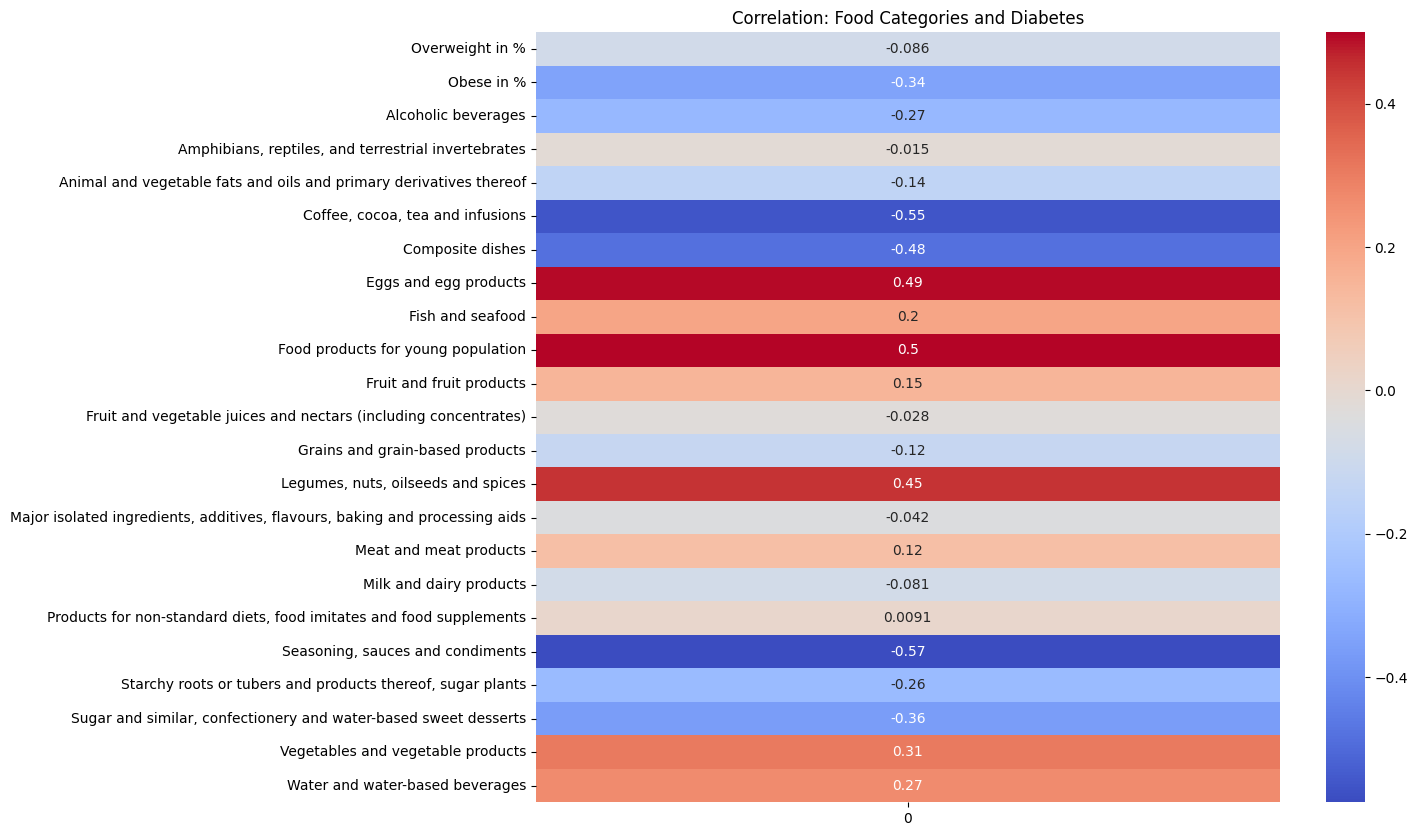

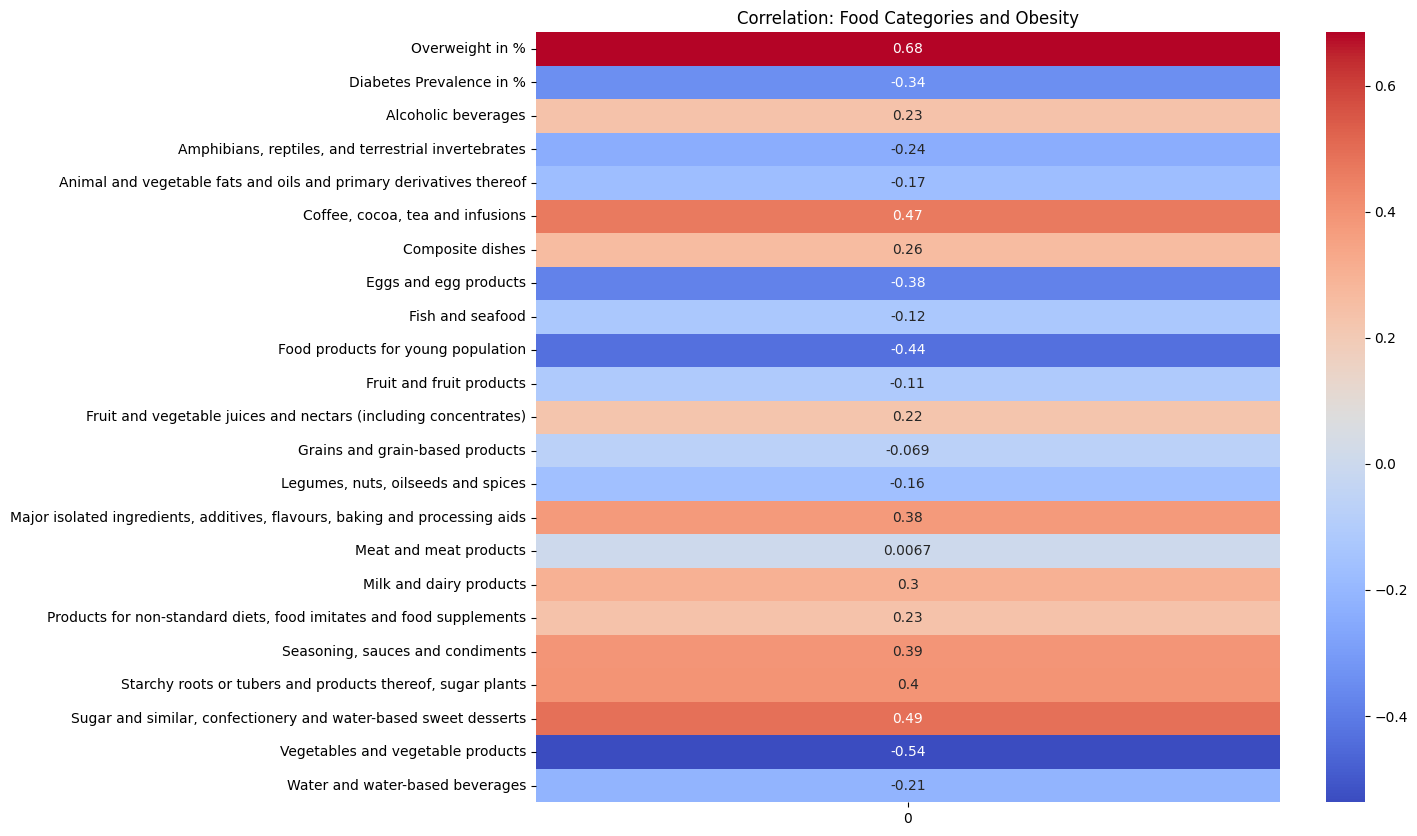

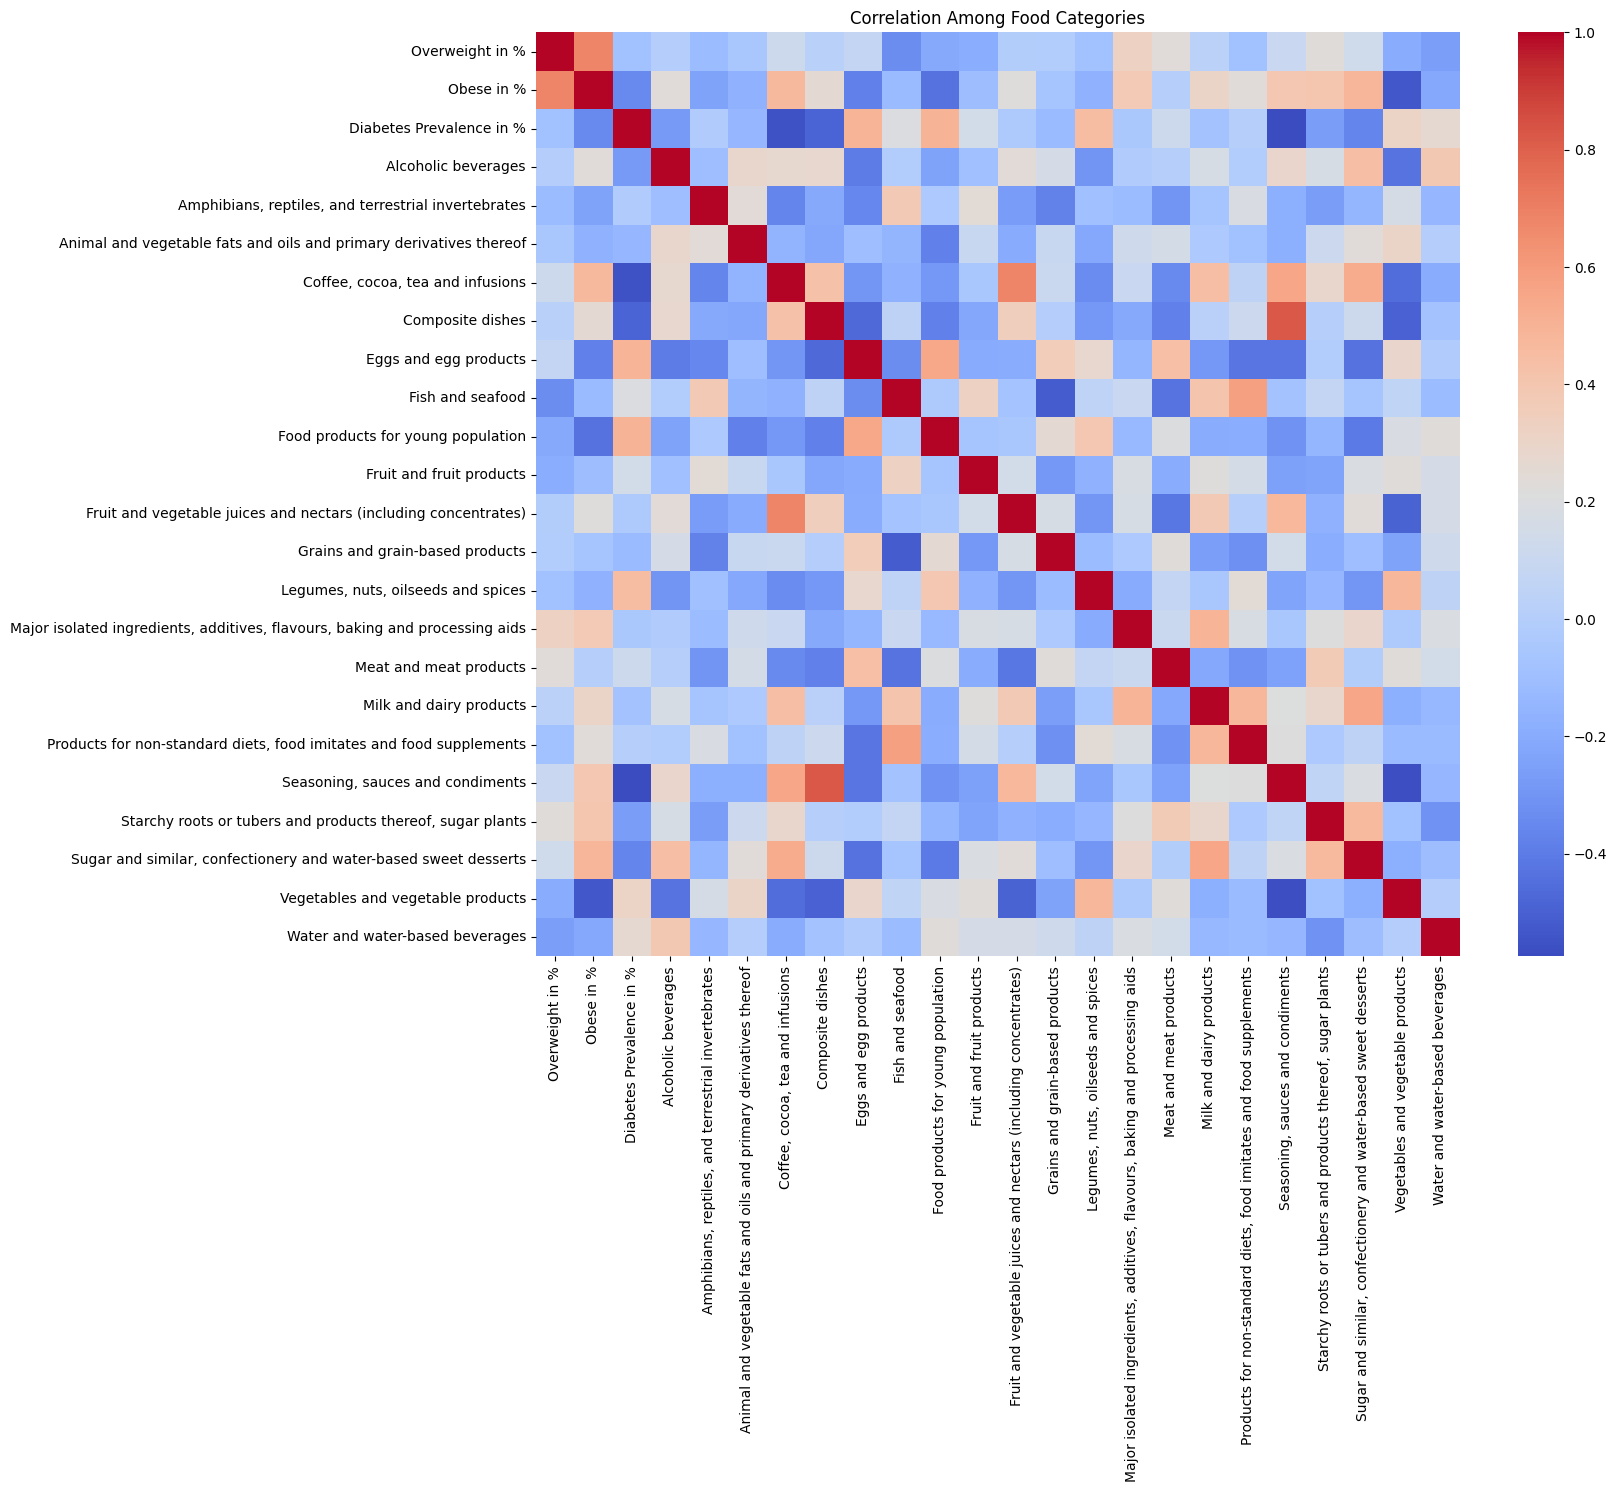

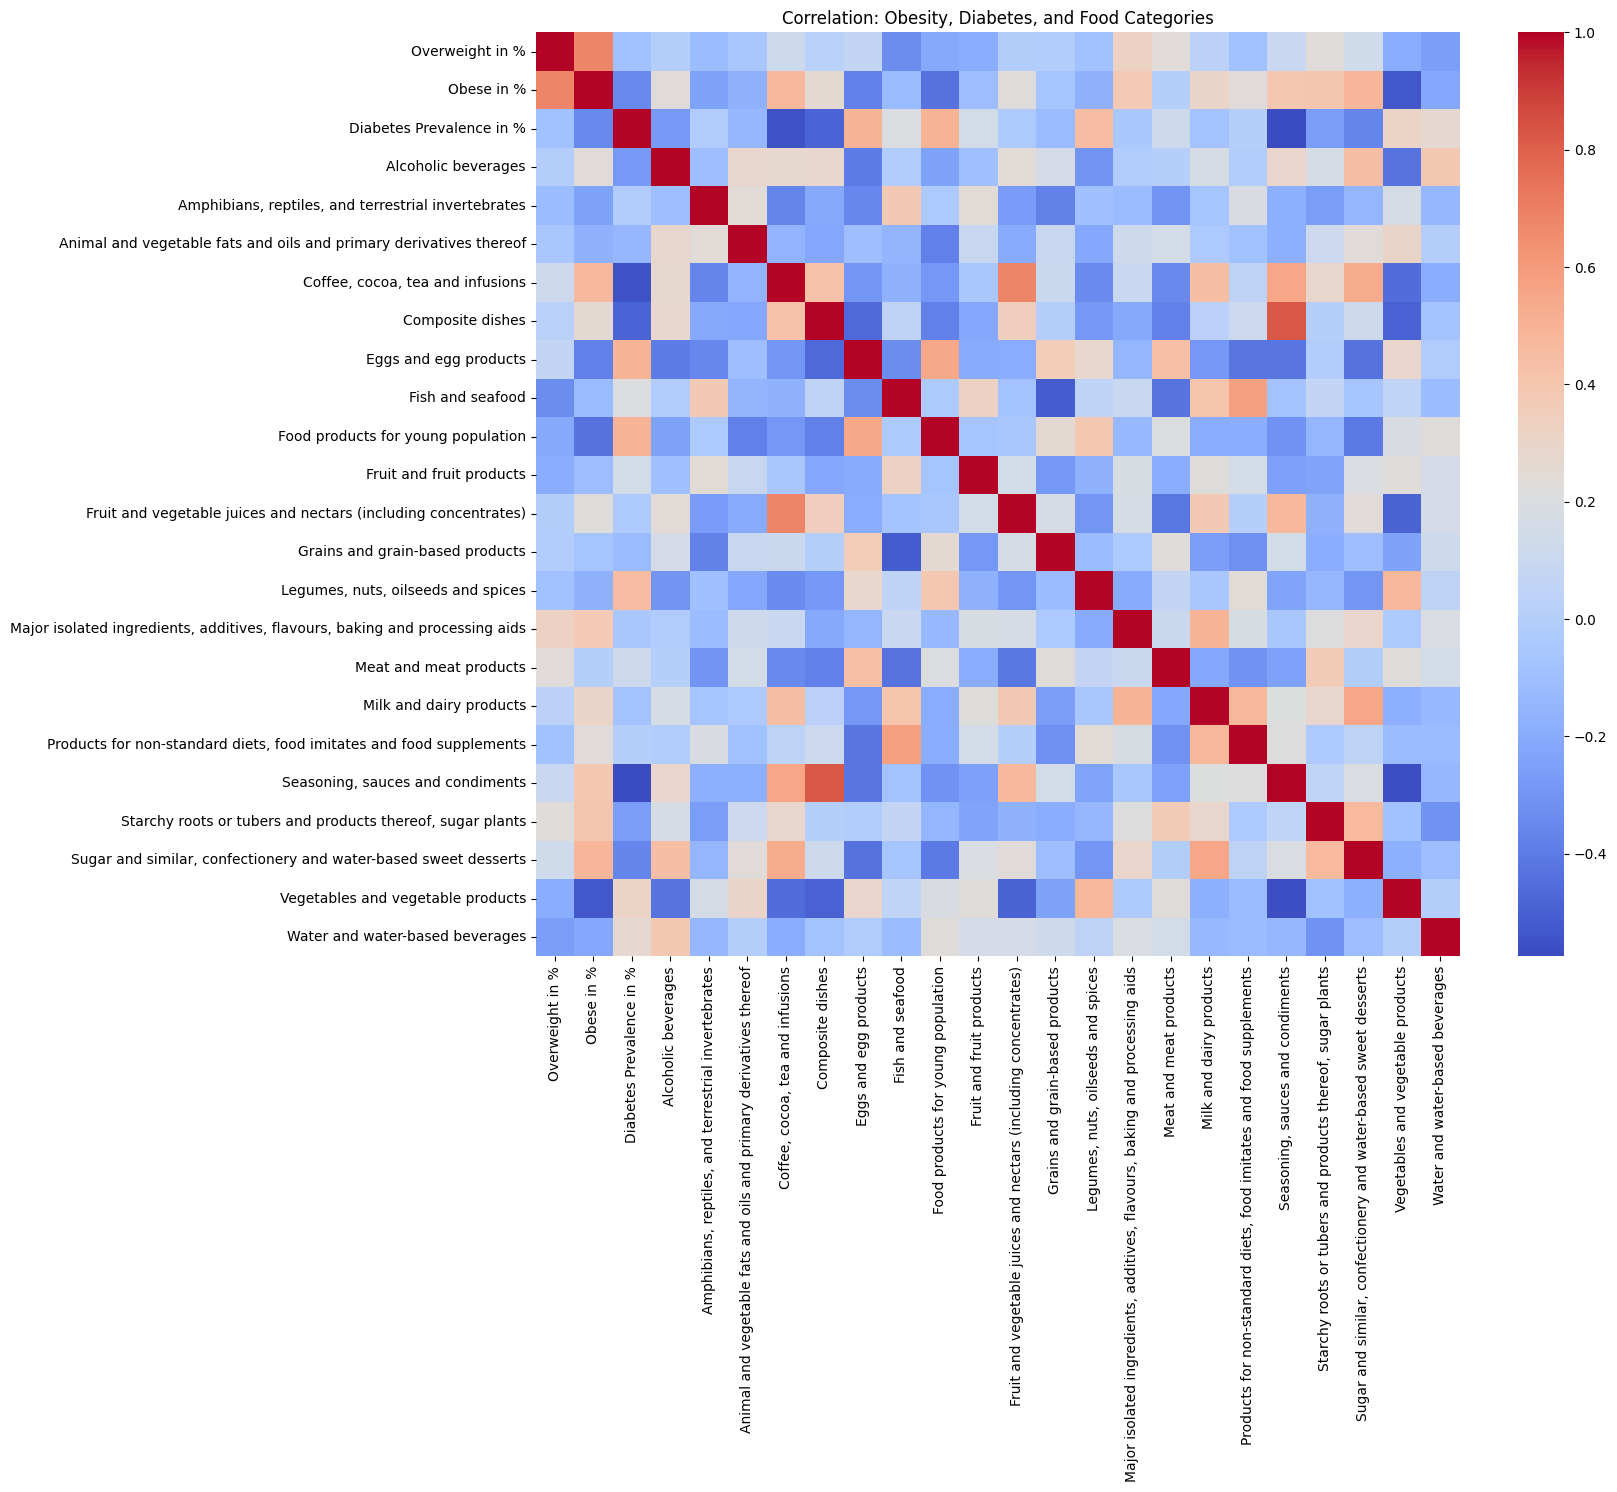

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt



# 2. Correlation between Food Categories and Diabetes
plt.figure(figsize=(12, 10))
sns.heatmap(df_nontime_data.drop(['Country', 'Region','Diabetes Prevalence in %'], axis=1).corrwith(df_nontime_data['Diabetes Prevalence in %']).to_frame(), 
            annot=True, cmap='coolwarm', cbar=True)
plt.title("Correlation: Food Categories and Diabetes")
plt.show()

# 3. Correlation between Food Categories and Obesity
plt.figure(figsize=(12, 10))
sns.heatmap(df_nontime_data.drop(['Country', 'Region','Obese in %'], axis=1).corrwith(df_nontime_data['Obese in %']).to_frame(), 
            annot=True, cmap='coolwarm', cbar=True)
plt.title("Correlation: Food Categories and Obesity")
plt.show()

# 4. Correlation among Food Categories
plt.figure(figsize=(15, 12))
sns.heatmap(df_nontime_data.iloc[:, 2:].corr(), annot=False, cmap='coolwarm', square=True, cbar=True)
plt.title("Correlation Among Food Categories")
plt.show()

# 5. Combined Correlation: Obesity, Diabetes, and Food Categories
plt.figure(figsize=(15, 12))
sns.heatmap(df_nontime_data.iloc[:, 2:].corr(), annot=False, cmap='coolwarm', square=True, cbar=True)
plt.title("Correlation: Obesity, Diabetes, and Food Categories")
plt.show()


## Data Exploration df_gdp_life_trade

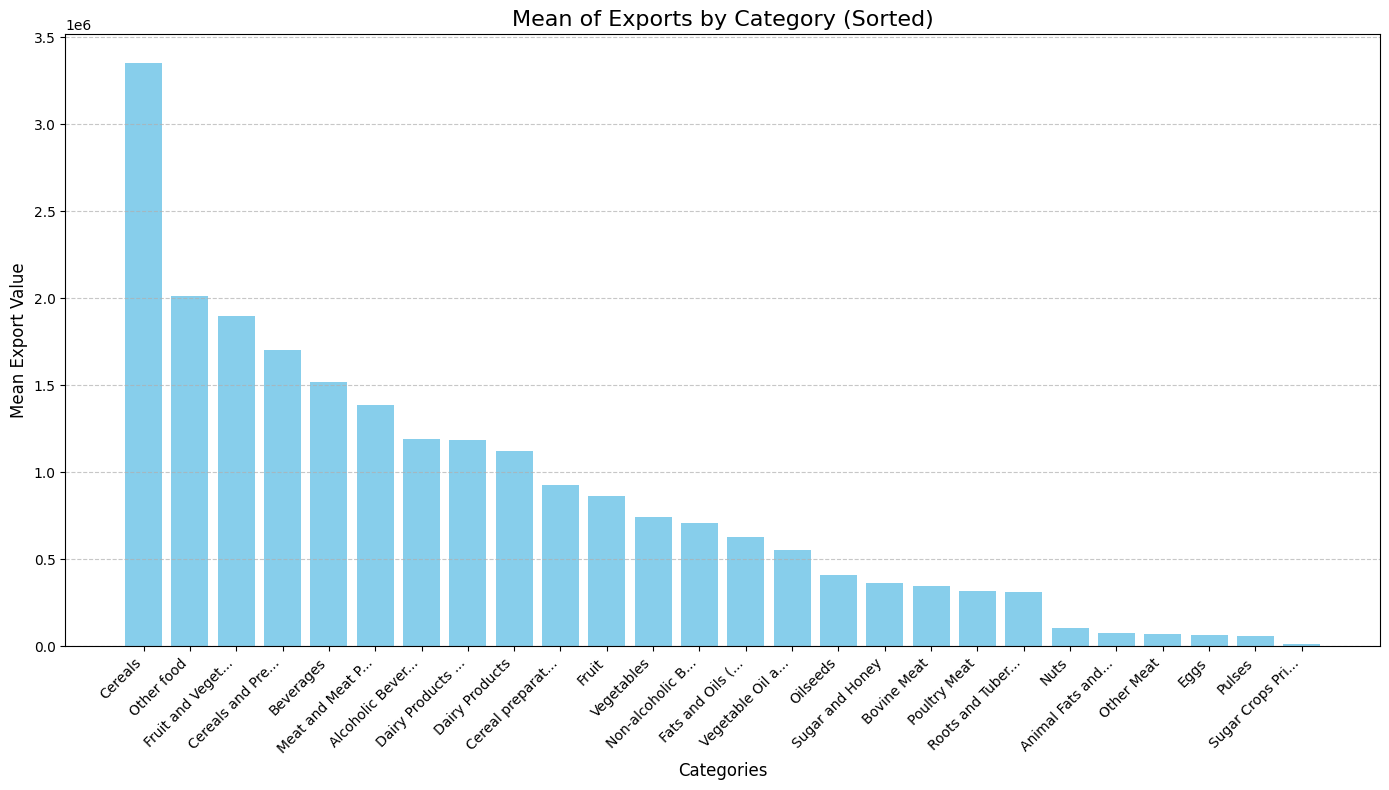

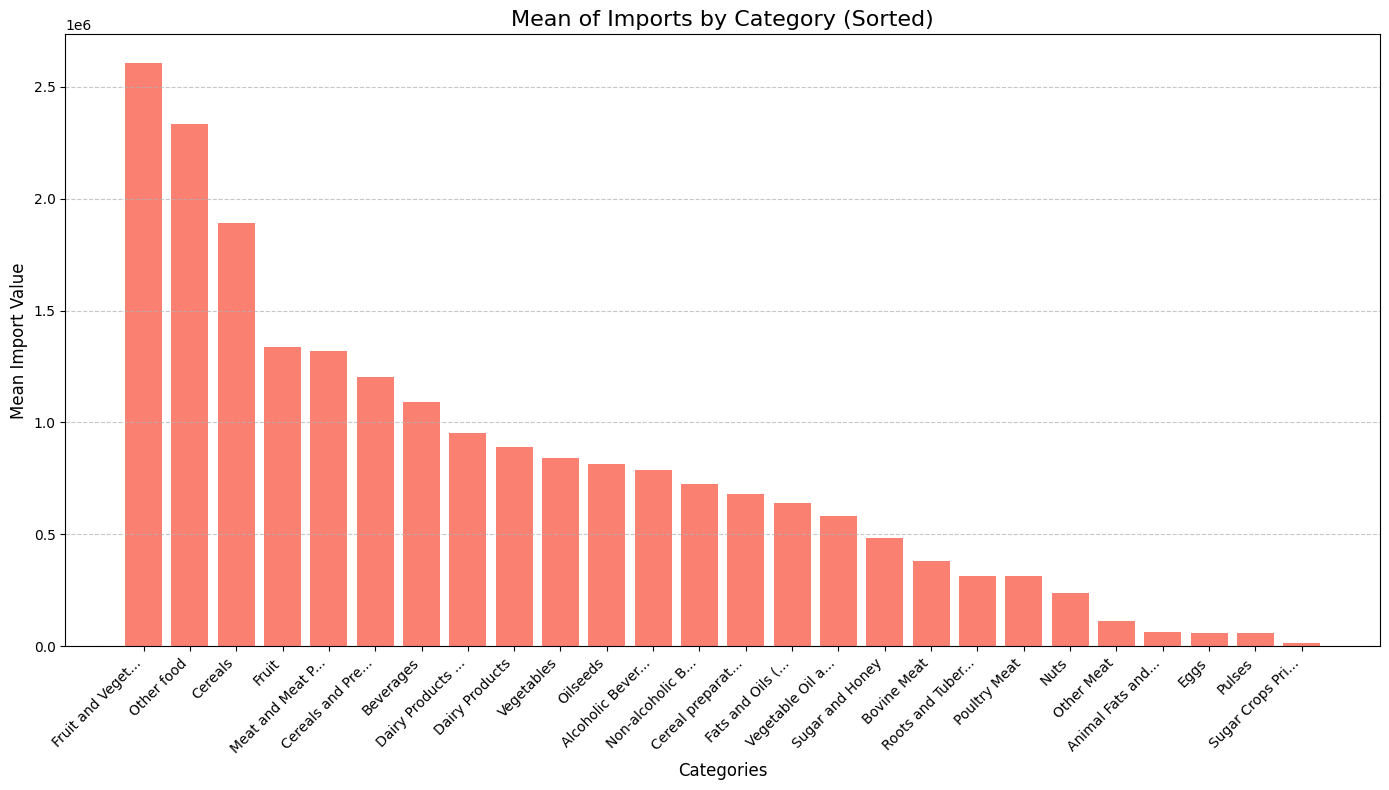

In [106]:
import matplotlib.pyplot as plt

# Correctly identify export and import columns in the MultiIndex structure
export_columns = [col for col in df_gdp_life_trade.columns if 'Export' in col[1]]
import_columns = [col for col in df_gdp_life_trade.columns if 'Import' in col[1]]

# Compute the mean values for the export and import columns
export_means = df_gdp_life_trade[export_columns].mean().sort_values(ascending=False)
import_means = df_gdp_life_trade[import_columns].mean().sort_values(ascending=False)

# Function to truncate long category names
def truncate_label(label, max_length=15):
    return label[:max_length] + "..." if len(label) > max_length else label

# Apply truncation to export and import labels after sorting
export_labels = [truncate_label(col[0]) for col in export_means.index]
import_labels = [truncate_label(col[0]) for col in import_means.index]

# Plot histogram for sorted export means
plt.figure(figsize=(14, 8))
plt.bar(export_labels, export_means, color='skyblue',)
plt.title('Mean of Exports by Category (Sorted)', fontsize=16)
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Mean Export Value', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')  # Rotate and align right
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot histogram for sorted import means
plt.figure(figsize=(14, 8))
plt.bar(import_labels, import_means, color='salmon')
plt.title('Mean of Imports by Category (Sorted)', fontsize=16)
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Mean Import Value', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')  # Rotate and align right
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 3.1 What are differences and similarities in food consumption/diets across European countries 
and regions?

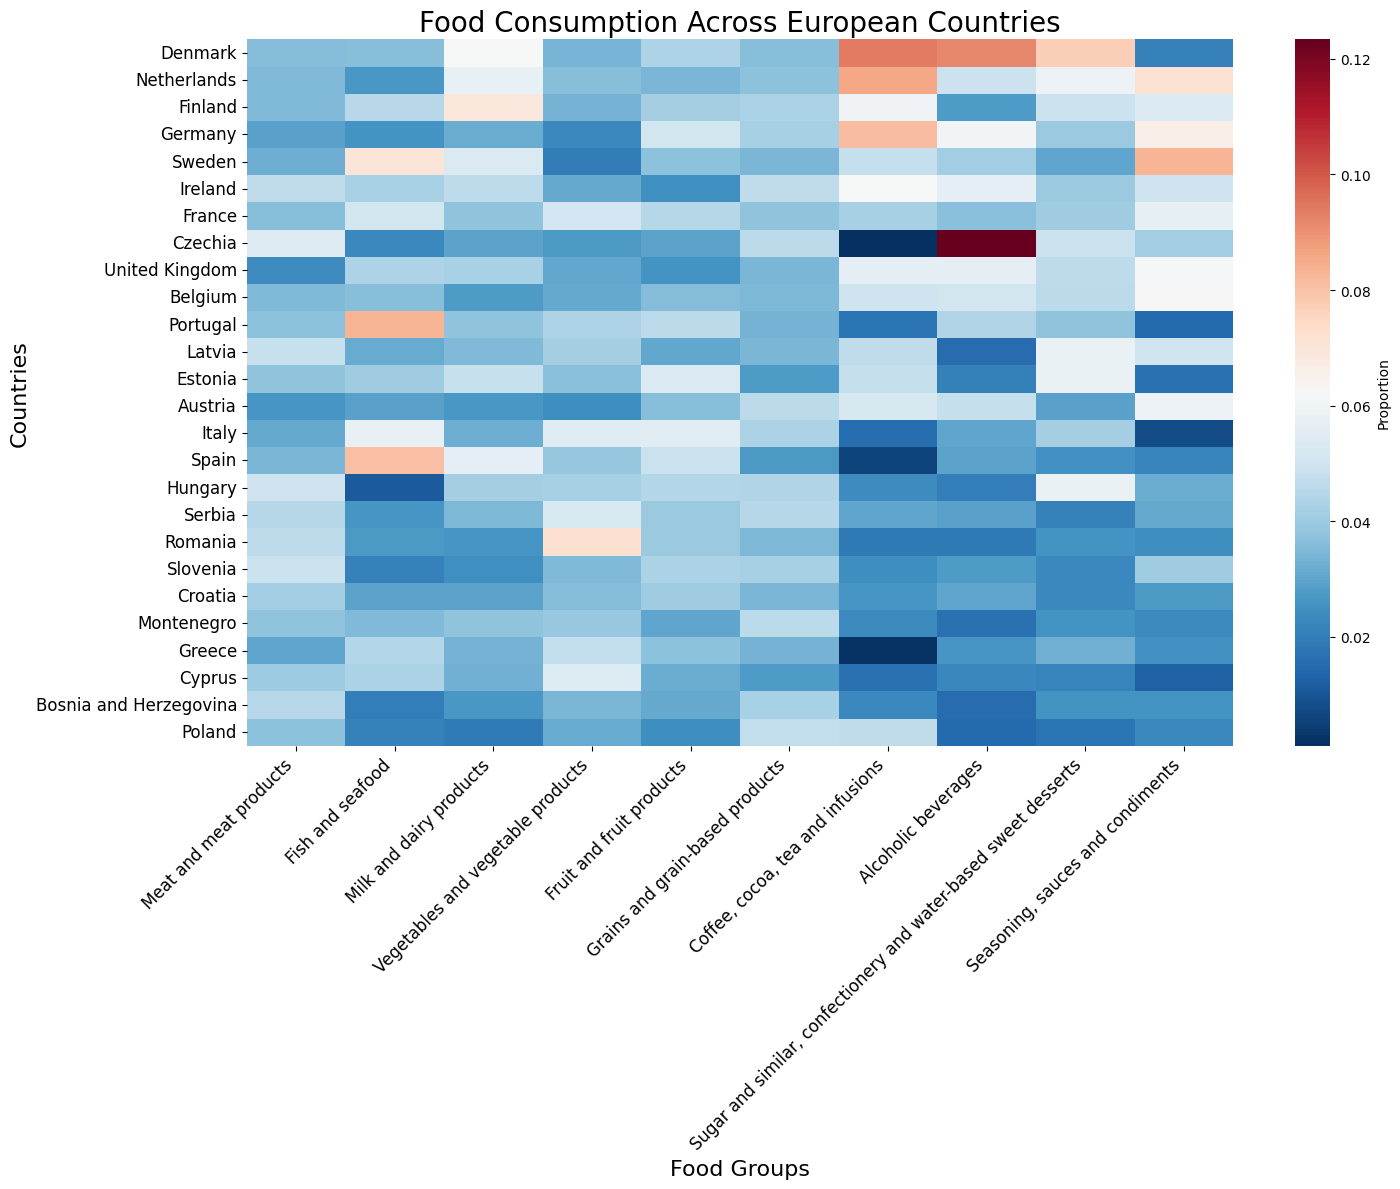

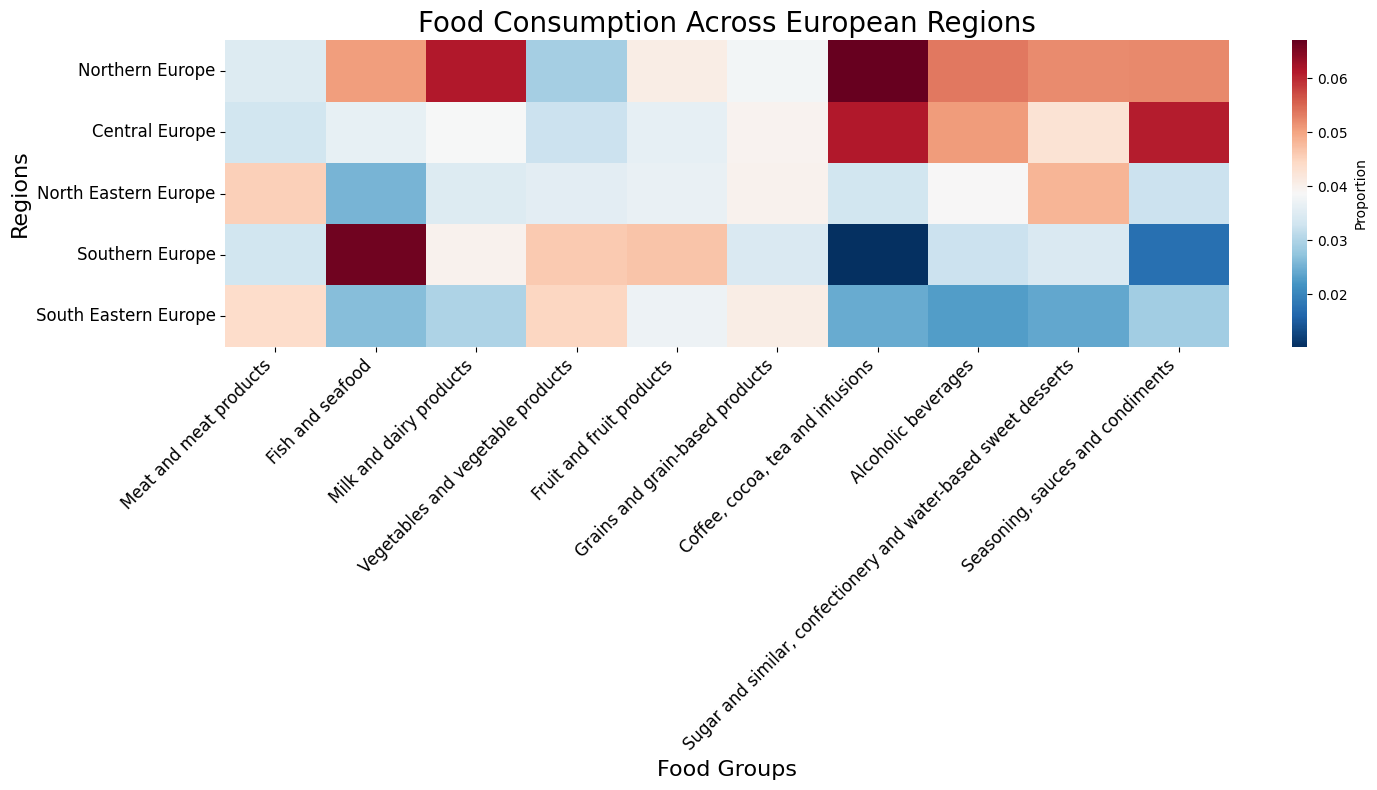

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load your data
df = df_nontime_data.copy()

# Normalize or scale food consumption columns

food_columns = [
    'Meat and meat products',
    'Fish and seafood',
    'Milk and dairy products',
    'Vegetables and vegetable products',
    'Fruit and fruit products',
    'Grains and grain-based products',
    'Coffee, cocoa, tea and infusions',
    'Alcoholic beverages',
    'Sugar and similar, confectionery and water-based sweet desserts',
    'Seasoning, sauces and condiments'
]
df[food_columns] = df[food_columns].apply(lambda x: x / x.sum(), axis=0)  # Normalize columns

# Summarize by country
country_summary = df.groupby('Country')[food_columns].mean()

# Summarize by region
region_summary = df.groupby('Region')[food_columns].mean()

# Sort countries and regions by total consumption
country_summary['Total'] = country_summary.sum(axis=1)
region_summary['Total'] = region_summary.sum(axis=1)

country_summary = country_summary.sort_values('Total', ascending=False)
region_summary = region_summary.sort_values('Total', ascending=False)

# Plot for countries
plt.figure(figsize=(15, 12))  # Increase figure size
sns.heatmap(country_summary[food_columns], cmap="RdBu_r", annot=False, cbar=True,cbar_kws={'label': 'Proportion'})
plt.title("Food Consumption Across European Countries", fontsize=20)
plt.xlabel("Food Groups", fontsize=16)
plt.ylabel("Countries", fontsize=16)
plt.xticks(rotation=45, fontsize=12, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Plot for regions
plt.figure(figsize=(15, 8))  # Increase figure size
sns.heatmap(region_summary[food_columns], cmap="RdBu_r", annot=False, cbar=True,cbar_kws={'label': 'Proportion'})
plt.title("Food Consumption Across European Regions", fontsize=20)
plt.xlabel("Food Groups", fontsize=16)
plt.ylabel("Regions", fontsize=16)
plt.xticks(rotation=45, fontsize=12, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# 3.1 What types of foods are mainly exported/imported in a specific country?


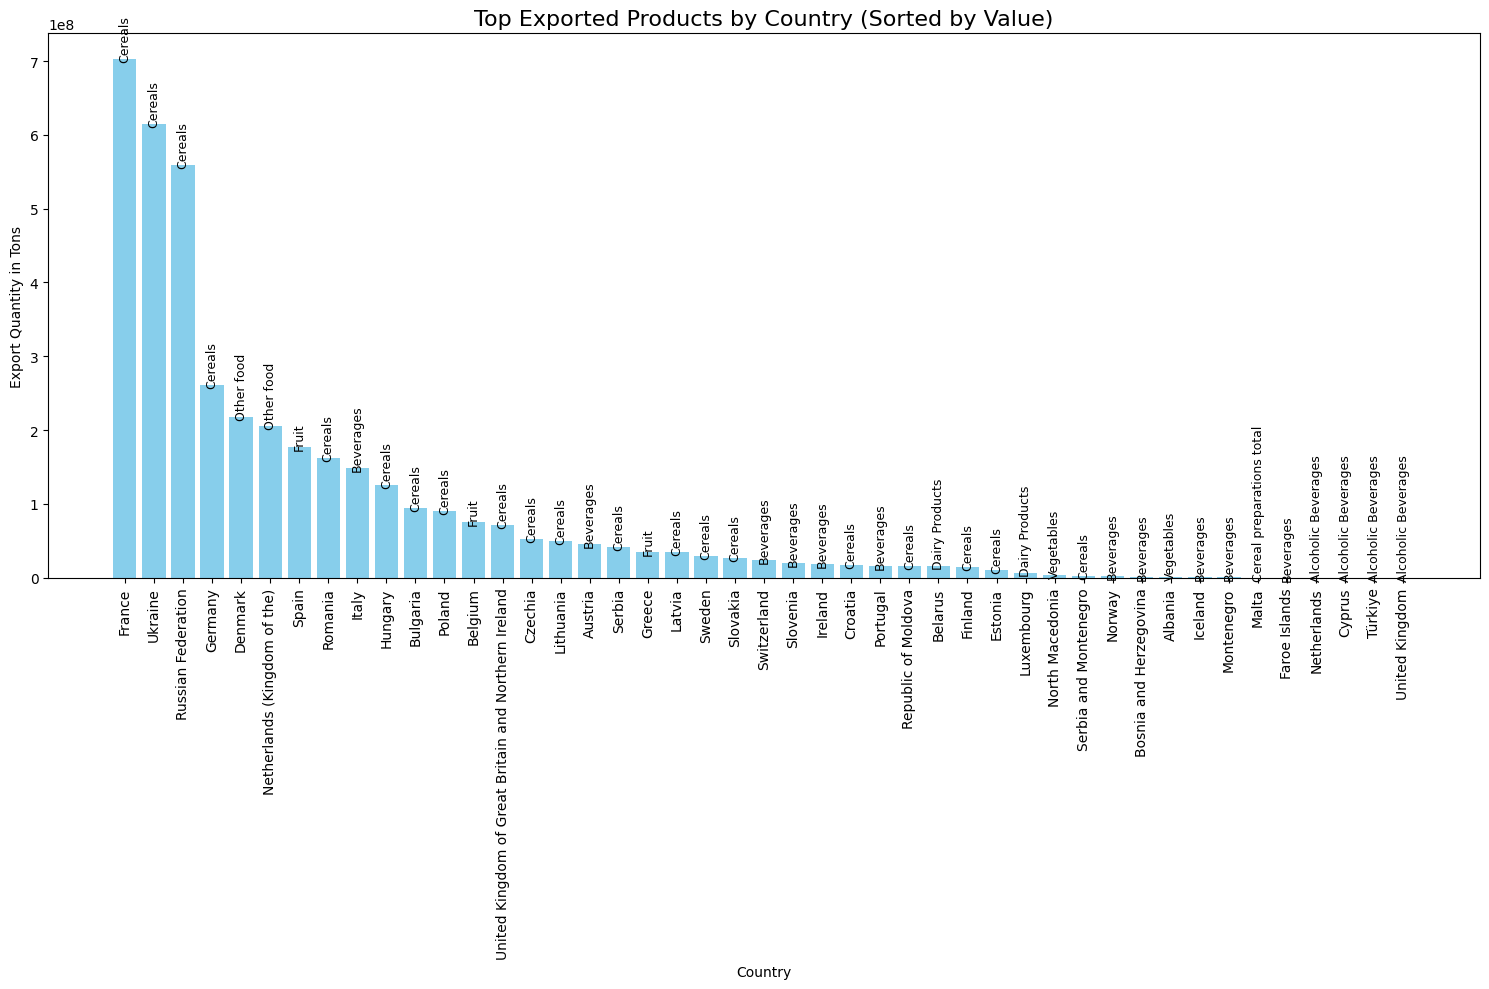

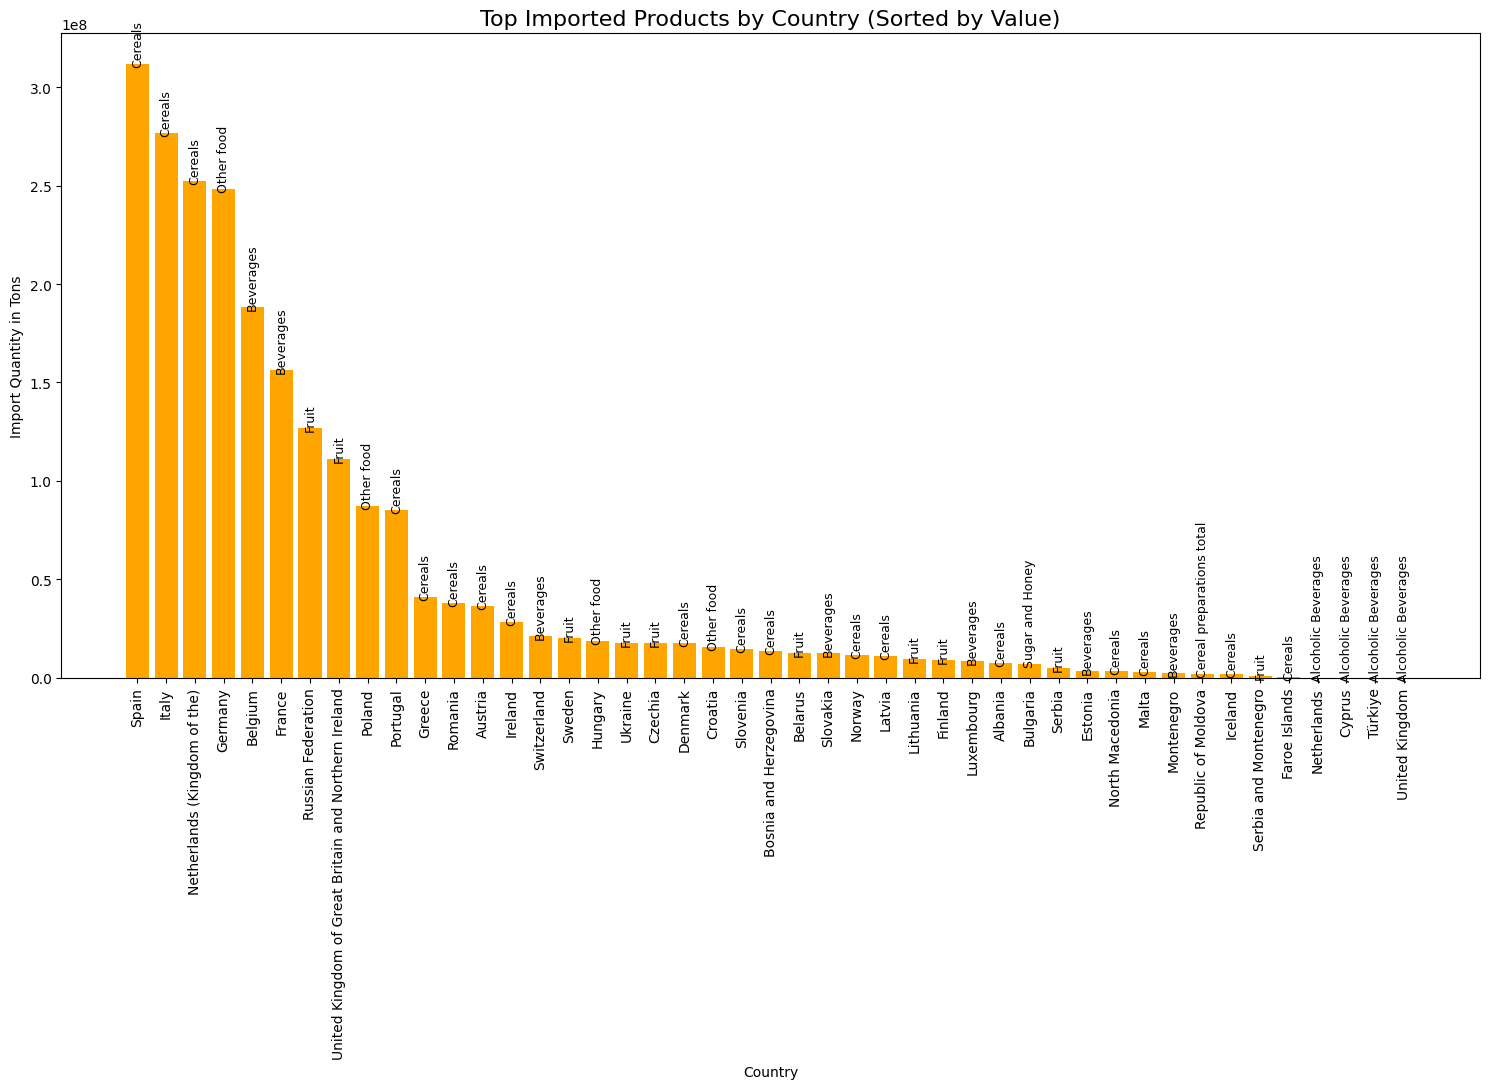

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter columns with 'Export quantity' and 'Import quantity'
export_columns = [col for col in df_gdp_life_trade.columns if col[1] == 'Export quantity']
import_columns = [col for col in df_gdp_life_trade.columns if col[1] == 'Import quantity']

# Group by 'Country' and sum export/import quantities
trade_summary = df_gdp_life_trade.groupby(('', 'Country'))[export_columns + import_columns].sum()

# Find the highest exported and imported product for each country
trade_summary['Top Exported Food'] = trade_summary[export_columns].idxmax(axis=1)
trade_summary['Top Export Value'] = trade_summary[export_columns].max(axis=1)

trade_summary['Top Imported Food'] = trade_summary[import_columns].idxmax(axis=1)
trade_summary['Top Import Value'] = trade_summary[import_columns].max(axis=1)

# Create a DataFrame for plotting
export_plot_data = trade_summary[['Top Exported Food', 'Top Export Value']].reset_index()
import_plot_data = trade_summary[['Top Imported Food', 'Top Import Value']].reset_index()

# Sort the data by value
export_plot_data = export_plot_data.sort_values('Top Export Value', ascending=False)
import_plot_data = import_plot_data.sort_values('Top Import Value', ascending=False)

# Remove "Export quantity" or "Import quantity" from category names for cleaner annotations
def clean_category_name(category):
    return category[0]  # Only return the main category name (first part of the tuple)

# Plot for Exports
plt.figure(figsize=(15, 10))
bars = plt.bar(export_plot_data[('', 'Country')], export_plot_data['Top Export Value'], color='skyblue')
plt.xticks(rotation=90, fontsize=10)
plt.title("Top Exported Products by Country (Sorted by Value)", fontsize=16)
plt.ylabel("Export Quantity in Tons")
plt.xlabel("Country")

# Annotate bars with cleaned product names
for bar, product in zip(bars, export_plot_data['Top Exported Food']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 5,  # Adjust position above the bar
        clean_category_name(product),  # Use the cleaned category name
        ha="center",
        fontsize=9,
        rotation=90  # Vertical annotation
    )

plt.tight_layout()
plt.show()

# Plot for Imports
plt.figure(figsize=(15, 11))
bars = plt.bar(import_plot_data[('', 'Country')], import_plot_data['Top Import Value'], color='orange')
plt.xticks(rotation=90, fontsize=10)
plt.title("Top Imported Products by Country (Sorted by Value)", fontsize=16)
plt.ylabel("Import Quantity in Tons")
plt.xlabel("Country")

# Annotate bars with cleaned product names
for bar, product in zip(bars, import_plot_data['Top Imported Food']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 5,  # Adjust position above the bar
        clean_category_name(product),  # Use the cleaned category name
        ha="center",
        fontsize=9,
        rotation=90  # Vertical annotation
    )

plt.tight_layout()
plt.show()


## 3. How import and export will change over time for each country?

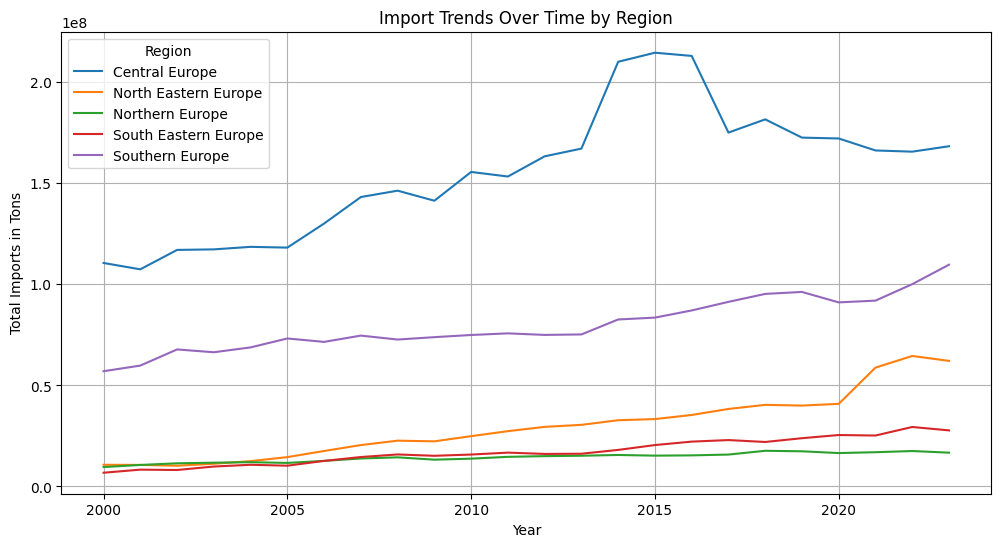

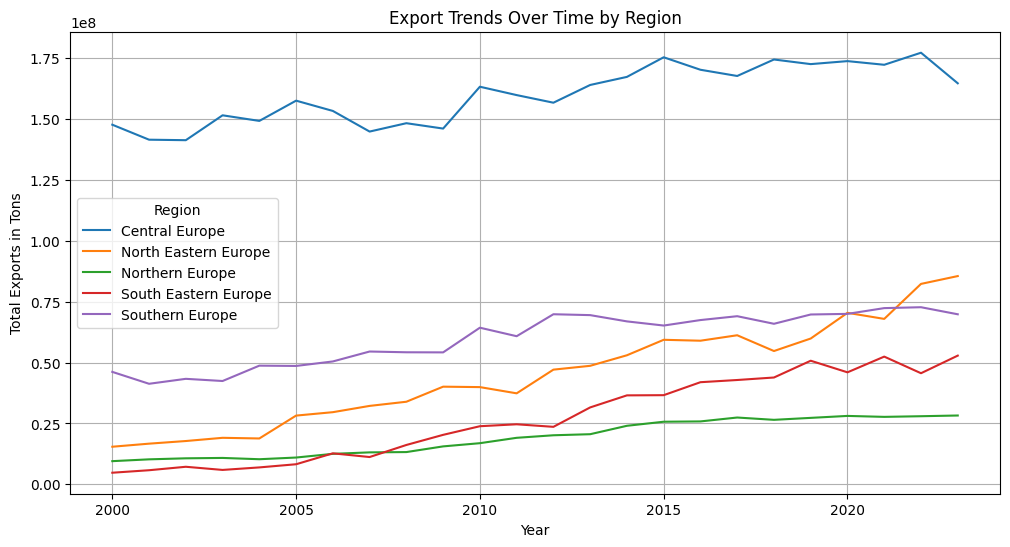

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make a copy of the original dataset
df_processed = df_gdp_life_trade.copy()

# Add a 'Region' column based on the country using the region_mapping
df_processed[('', 'Region')] = df_processed[('', 'Country')].map(region_mapping)

# Extract relevant columns for imports and exports
import_columns = [col for col in df_processed.columns if 'Import quantity' in col[1]]
export_columns = [col for col in df_processed.columns if 'Export quantity' in col[1]]

# Keep only numeric columns for aggregation
numeric_columns = import_columns + export_columns
numeric_columns.append(('', 'Year'))  # Ensure 'Year' is included
numeric_columns.append(('', 'Region'))  # Ensure 'Region' is included

# Filter the dataset to keep only numeric columns and grouping keys
df_numeric = df_processed[numeric_columns]

# Group by Year and Region, summing up import/export quantities
summary = df_numeric.groupby([('', 'Year'), ('', 'Region')]).sum(numeric_only=True)

# Create separate DataFrames for imports and exports
import_summary = summary[import_columns].sum(axis=1).reset_index(name='Total Imports')
export_summary = summary[export_columns].sum(axis=1).reset_index(name='Total Exports')

# Merge the summaries
import_export_summary = import_summary.merge(
    export_summary,
    on=[('', 'Year'), ('', 'Region')],
    how='inner'
)

# Plot for imports
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=import_export_summary,
    x=('', 'Year'),
    y='Total Imports',
    hue=('', 'Region')
)
plt.title('Import Trends Over Time by Region')
plt.xlabel('Year')
plt.ylabel('Total Imports in Tons')
plt.legend(title='Region')
plt.grid(True)
plt.show()

# Plot for exports
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=import_export_summary,
    x=('', 'Year'),
    y='Total Exports',
    hue=('', 'Region')
)
plt.title('Export Trends Over Time by Region')
plt.xlabel('Year')
plt.ylabel('Total Exports in Tons')
plt.legend(title='Region')
plt.grid(True)
plt.show()


## 4  Is there a relationship between life expectancy and food consumption?

Correlation between Total Food Consumption and Life Expectancy: 0.25


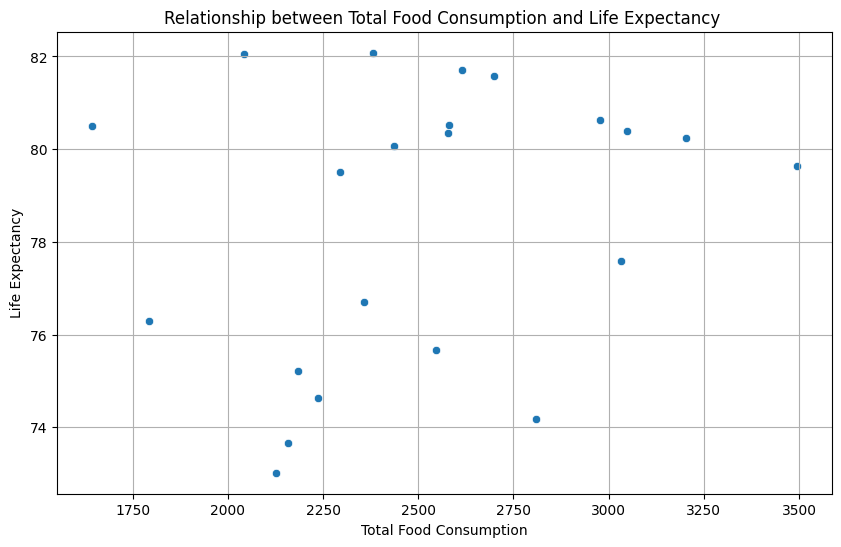

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create a new variable for food consumption data and add a total food consumption column
df_food_consumption = df_nontime_data.copy()
df_food_consumption['Total Food Consumption'] = df_food_consumption.iloc[:, 5:].sum(axis=1)

# Step 2: Create a new variable for mean life expectancy at the country level
df_life_expectancy_mean = df_long_life.groupby('Area', as_index=False).agg({'Life Expectancy': 'mean'})

# Step 3: Merge the datasets at the country level
df_life_expectancy_mean = df_life_expectancy_mean.rename(columns={'Area': 'Country'})
df_combined = pd.merge(df_food_consumption[['Country', 'Total Food Consumption']],
                       df_life_expectancy_mean, on='Country', how='inner')

# Step 4: Correlation analysis
correlation = df_combined[['Total Food Consumption', 'Life Expectancy']].corr().iloc[0, 1]
print(f"Correlation between Total Food Consumption and Life Expectancy: {correlation:.2f}")

# Step 5: Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_combined, x='Total Food Consumption', y='Life Expectancy')
plt.title('Relationship between Total Food Consumption and Life Expectancy ')
plt.xlabel('Total Food Consumption')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

## 5  Is there a relationship between the prevelance of diabetes and food consumption?


Correlation between Diabetes Prevalence and Total Food Consumption: -0.26

Correlation between Diabetes Prevalence and Individual Food Categories:
Food products for young population                                             0.499704
Eggs and egg products                                                          0.494241
Legumes, nuts, oilseeds and spices                                             0.447297
Vegetables and vegetable products                                              0.308083
Water and water-based beverages                                                0.266377
Fish and seafood                                                               0.197927
Fruit and fruit products                                                       0.149159
Meat and meat products                                                         0.115392
Products for non-standard diets, food imitates and food supplements            0.009071
Amphibians, reptiles, and terrestrial invertebrates          

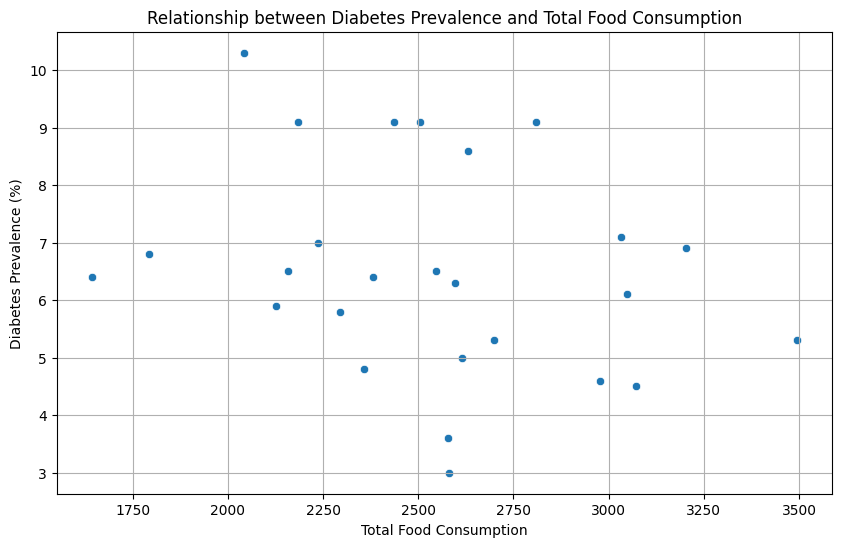

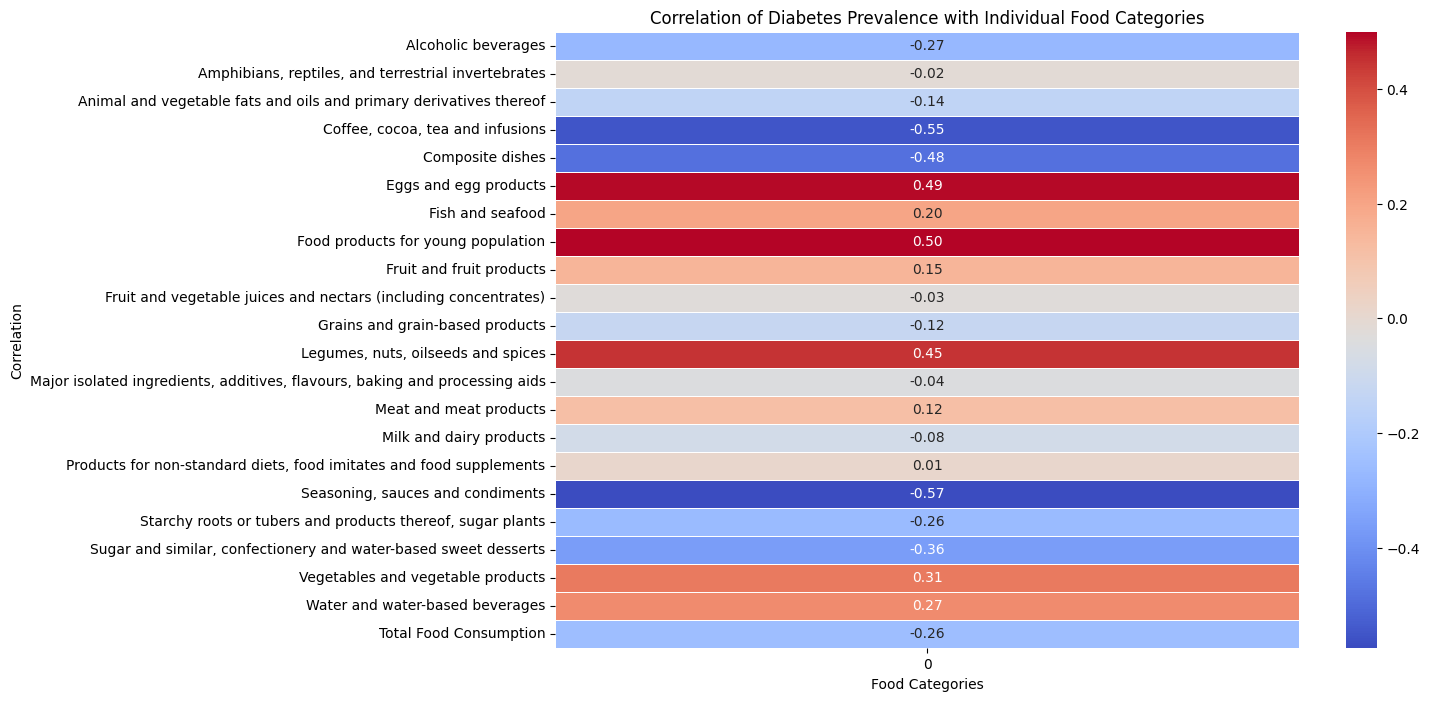

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Correlation Analysis
# Correlation between diabetes prevalence and total food consumption
correlation_total = df_food_consumption[['Diabetes Prevalence in %', 'Total Food Consumption']].corr().iloc[0, 1]
print(f"Correlation between Diabetes Prevalence and Total Food Consumption: {correlation_total:.2f}")

# Correlation between diabetes prevalence and individual food categories
food_columns = df_food_consumption.columns[5:]  # Exclude Country, Region, and Total Food Consumption
correlation_individual = df_food_consumption[food_columns].corrwith(df_food_consumption['Diabetes Prevalence in %'])
print("\nCorrelation between Diabetes Prevalence and Individual Food Categories:")
print(correlation_individual.sort_values(ascending=False))

# Step 3: Visualization
# Scatterplot for Total Food Consumption vs Diabetes Prevalence
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_food_consumption, x='Total Food Consumption', y='Diabetes Prevalence in %')
plt.title('Relationship between Diabetes Prevalence and Total Food Consumption')
plt.xlabel('Total Food Consumption')
plt.ylabel('Diabetes Prevalence (%)')
plt.grid(True)
plt.show()

# Optional: Heatmap of correlations with individual food categories
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_individual.to_frame(), annot=True, cmap='coolwarm', cbar=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation of Diabetes Prevalence with Individual Food Categories')
plt.xlabel('Food Categories')
plt.ylabel('Correlation')
plt.yticks(rotation=0)
plt.show()


## 6  Is there a relationship between the obesity rate and food consumption?


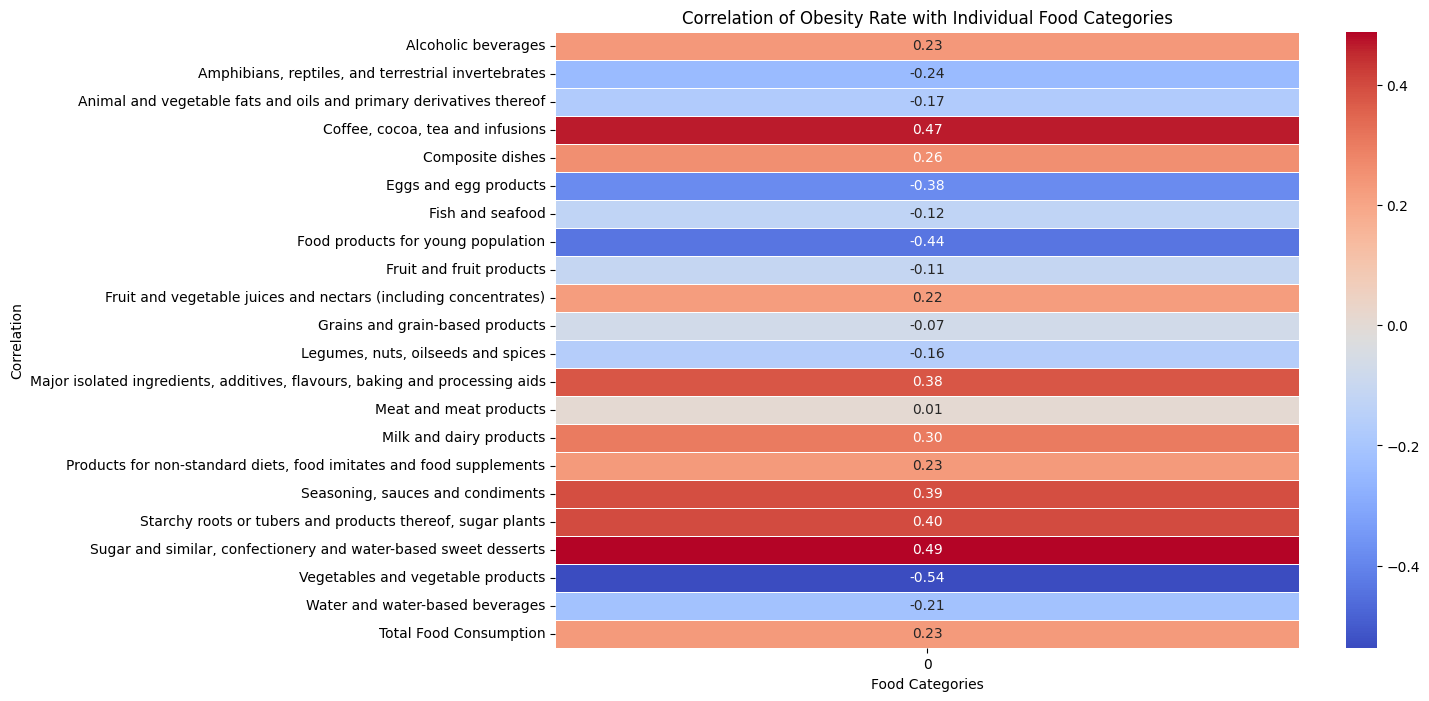

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Identify food consumption columns
food_columns = df_food_consumption.columns[5:]  # Select only food consumption columns (starting after 'Obese in %')

# Step 3: Correlation Analysis
# Correlation between obesity rate and total food consumption
correlation_total = df_food_consumption[['Obese in %', 'Total Food Consumption']].corr().iloc[0, 1]


# Correlation between obesity rate and individual food categories
correlation_individual = df_food_consumption[food_columns].corrwith(df_food_consumption['Obese in %'])



# Heatmap of correlations with individual food categories
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_individual.to_frame(), annot=True, cmap='coolwarm', cbar=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation of Obesity Rate with Individual Food Categories')
plt.xlabel('Food Categories')
plt.ylabel('Correlation')
plt.yticks(rotation=0)
plt.show()


In [96]:
df_gdp_life_trade.head()

Alcoholic Beverages               \
   Country  Year GDP_PC Life Expectancy     Export quantity Export value   
0  Albania  2000   3200            76.2                26.0         35.0   
1  Albania  2001   3600            76.3                35.0         52.0   
2  Albania  2002   3800            76.4                70.0         64.0   
3  Albania  2003   4100            76.6               130.0        167.0   
4  Albania  2004   4400            76.7               320.0        265.0   

                               Animal Fats and Oils (excl. Butter)  \
  Import quantity Import value                     Export quantity   
0         33354.0      12533.0                                 0.0   
1         37187.0      15916.0                                 0.0   
2         29474.0      15730.0                                 0.0   
3         28265.0      18193.0                                 0.0   
4         24729.0      18678.0                                 0.0   

                ... Sugar and Honey              Vegetable Oil and Fat  \
  Export value  ... Import quantity Import value       Export quantity   
0          0.0  ...         59993.0      15406.0                  39.0   
1          0.0  ...         57437.0      15304.0                   5.0   
2          0.0  ...         67945.0      18361.0                  14.0   
3          0.0  ...         66291.0      18335.0                 200.0   
4          0.0  ...         83846.0      18776.0                 281.0   

                                                 Vegetables               \
  Export value Import quantity Import value Export quantity Export value   
0         45.0         35803.0      20150.0           789.0        514.0   
1          4.0         36855.0      18847.0           585.0        596.0   
2         11.0         34706.0      21262.0           972.0        724.0   
3        326.0         40214.0      28600.0          1116.0        502.0   
4        339.0         40055.0      32319.0          2003.0       1699.0   

                                
  Import quantity Import value  
0         21762.0       6589.0  
1         21847.0       8500.0  
2         33755.0      11428.0  
3         33928.0      13102.0  
4         23576.0      15339.0  

[5 rows x 98 columns]

## 7 Is there a relationship between the amount and types of food exported/imported and food consumption?

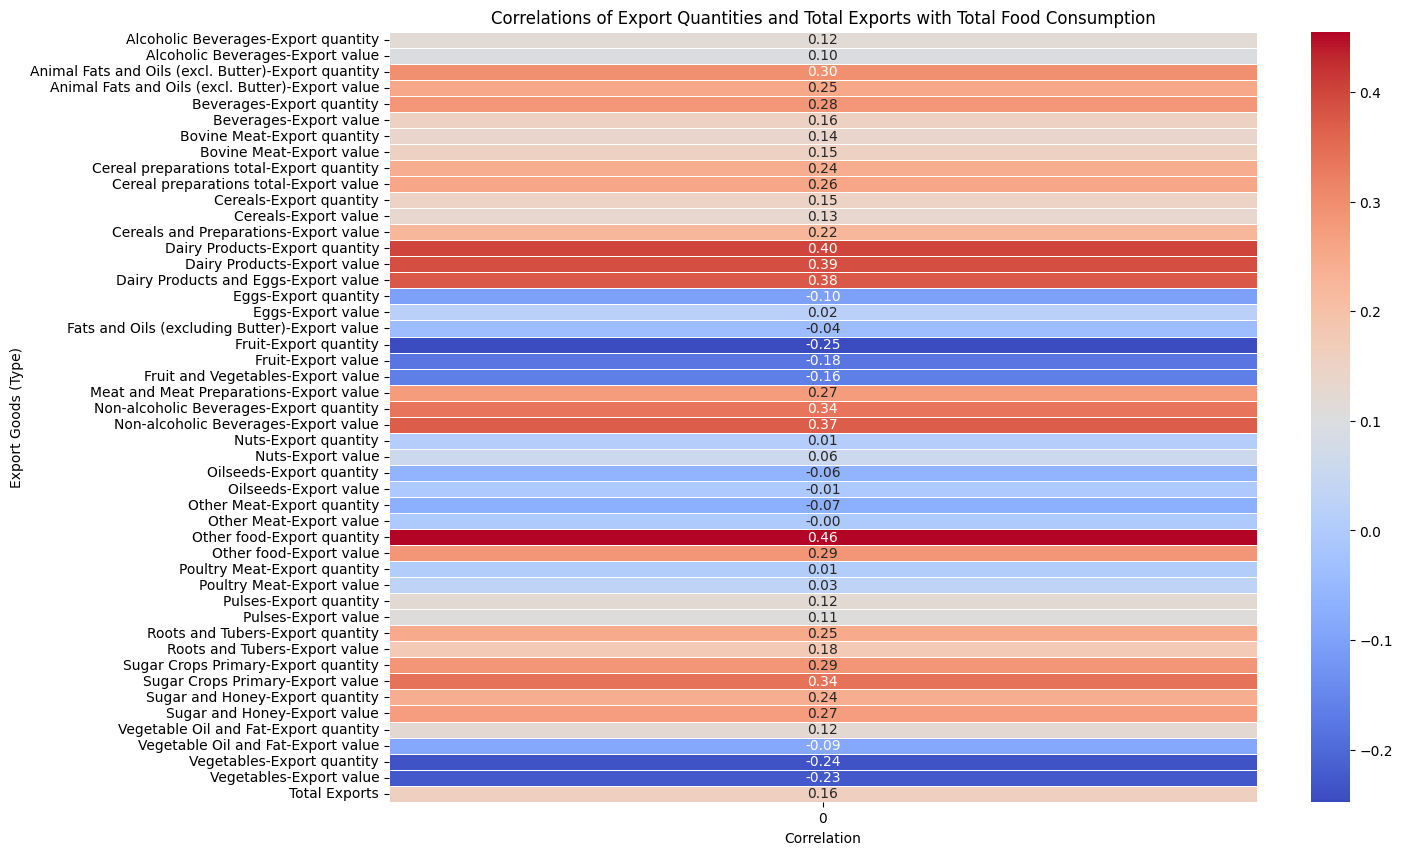

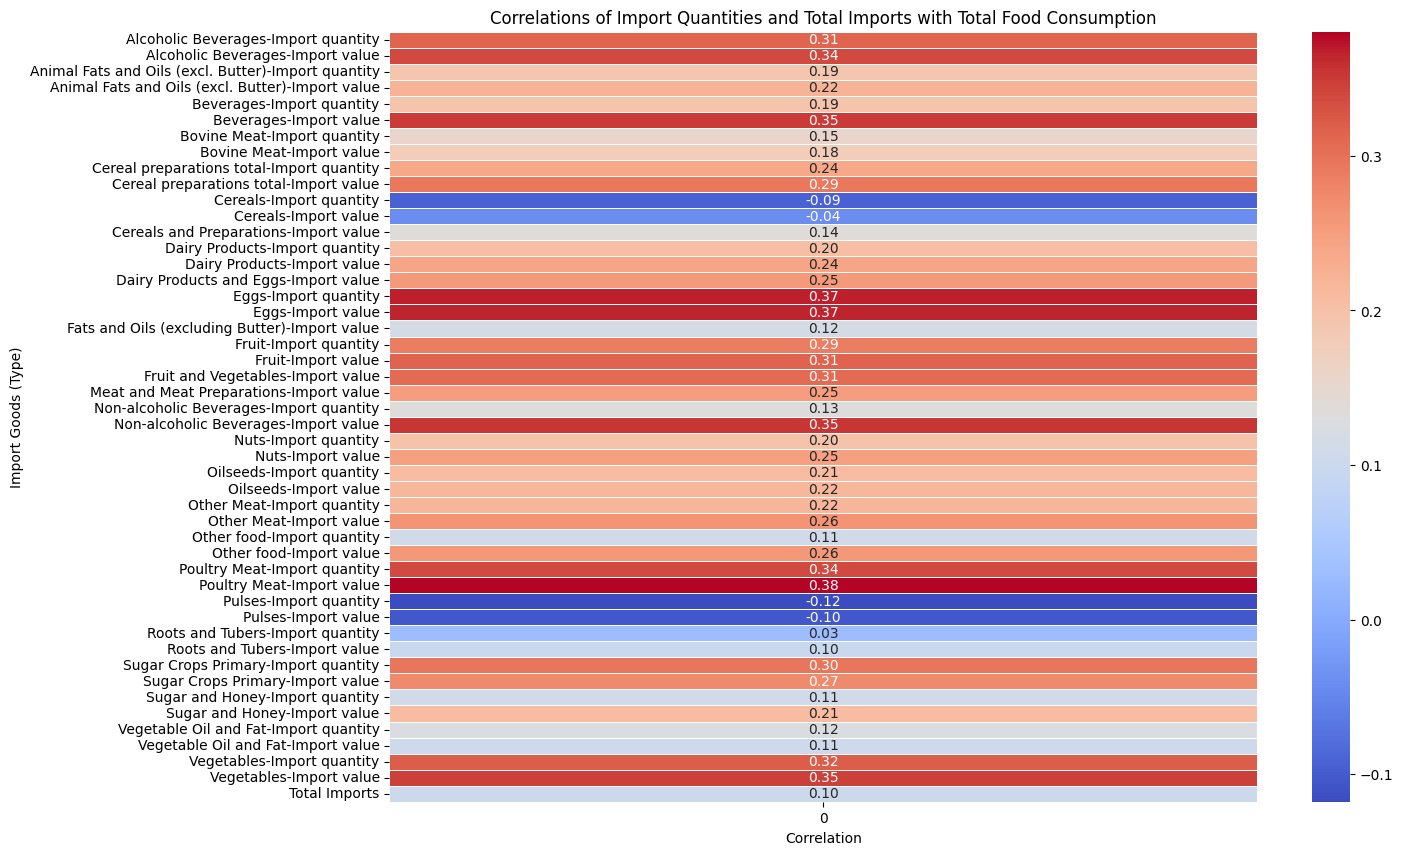

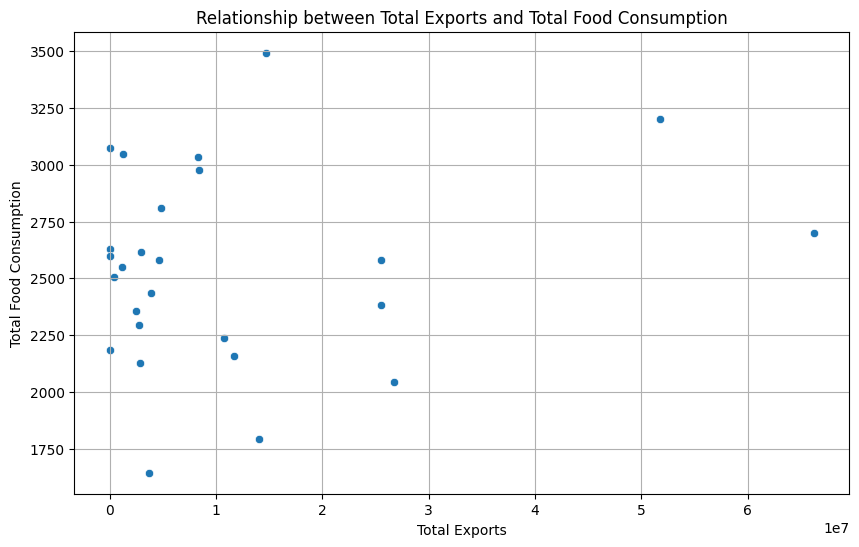

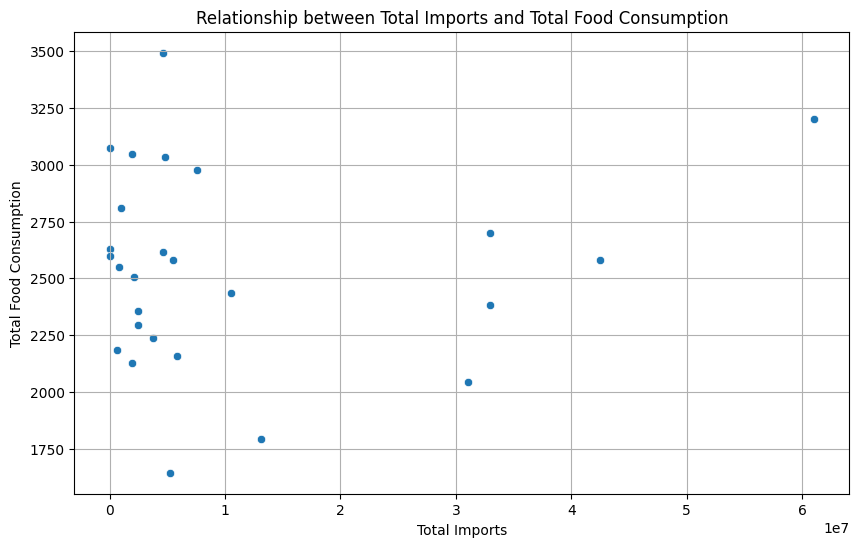


Top Correlations for Exports with Total Food Consumption:
Other food-Export quantity                             0.455248
Dairy Products-Export quantity                         0.402060
Dairy Products-Export value                            0.389478
Dairy Products and Eggs-Export value                   0.377694
Non-alcoholic Beverages-Export value                   0.371951
Sugar Crops Primary-Export value                       0.342487
Non-alcoholic Beverages-Export quantity                0.338841
Animal Fats and Oils (excl. Butter)-Export quantity    0.296104
Other food-Export value                                0.287371
Sugar Crops Primary-Export quantity                    0.287075
dtype: float64

Top Correlations for Imports with Total Food Consumption:
Poultry Meat-Import value               0.380240
Eggs-Import quantity                    0.368491
Eggs-Import value                       0.365516
Non-alcoholic Beverages-Import value    0.354157
Beverages-Import value         

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Flatten MultiIndex columns
df_trade_copy = df_gdp_life_trade.copy()
df_trade_copy.columns = ['-'.join(col).strip() if isinstance(col, tuple) else col for col in df_trade_copy.columns]

# Step 2: Group by '-Country' and aggregate export/import columns
# Identify import/export columns
export_columns = [col for col in df_trade_copy.columns if 'Export' in col]
import_columns = [col for col in df_trade_copy.columns if 'Import' in col]

# Group by '-Country' and calculate the mean for export/import-related columns
df_aggregated_trade = df_trade_copy.groupby('-Country', as_index=False)[export_columns + import_columns].mean()

# Step 3: Calculate total exports and imports
df_aggregated_trade['Total Exports'] = df_aggregated_trade[[col for col in export_columns if 'quantity' in col]].sum(axis=1)
df_aggregated_trade['Total Imports'] = df_aggregated_trade[[col for col in import_columns if 'quantity' in col]].sum(axis=1)

# Step 4: Merge with Food Consumption Data
df_combined = pd.merge(
    df_aggregated_trade,
    df_food_consumption.rename(columns={'Country': '-Country'})[['-Country', 'Total Food Consumption']],
    on='-Country',
    how='inner'
)

# Step 5: Correlation Analysis
# Compute correlations for export and import separately
correlation_exports = df_combined[export_columns + ['Total Exports']].corrwith(df_combined['Total Food Consumption'])
correlation_imports = df_combined[import_columns + ['Total Imports']].corrwith(df_combined['Total Food Consumption'])

# Step 6: Visualization - Heatmaps for Exports and Imports

# Heatmap for Export Correlations
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_exports.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)
plt.title('Correlations of Export Quantities and Total Exports with Total Food Consumption')
plt.xlabel('Correlation')
plt.ylabel('Export Goods (Type)')
plt.show()

# Heatmap for Import Correlations
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_imports.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)
plt.title('Correlations of Import Quantities and Total Imports with Total Food Consumption')
plt.xlabel('Correlation')
plt.ylabel('Import Goods (Type)')
plt.show()

# Scatterplot for Total Exports vs Total Food Consumption
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_combined, x='Total Exports', y='Total Food Consumption')
plt.title('Relationship between Total Exports and Total Food Consumption')
plt.xlabel('Total Exports')
plt.ylabel('Total Food Consumption')
plt.grid(True)
plt.show()

# Scatterplot for Total Imports vs Total Food Consumption
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_combined, x='Total Imports', y='Total Food Consumption')
plt.title('Relationship between Total Imports and Total Food Consumption')
plt.xlabel('Total Imports')
plt.ylabel('Total Food Consumption')
plt.grid(True)
plt.show()

# Optional: Display top correlations for exports and imports
print("\nTop Correlations for Exports with Total Food Consumption:")
print(correlation_exports.sort_values(ascending=False).head(10))

print("\nTop Correlations for Imports with Total Food Consumption:")
print(correlation_imports.sort_values(ascending=False).head(10))


## 8 Is there a relationship between the GDP per capita and food consumption?

Correlation between GDP per Capita and Total Food Consumption: 0.52


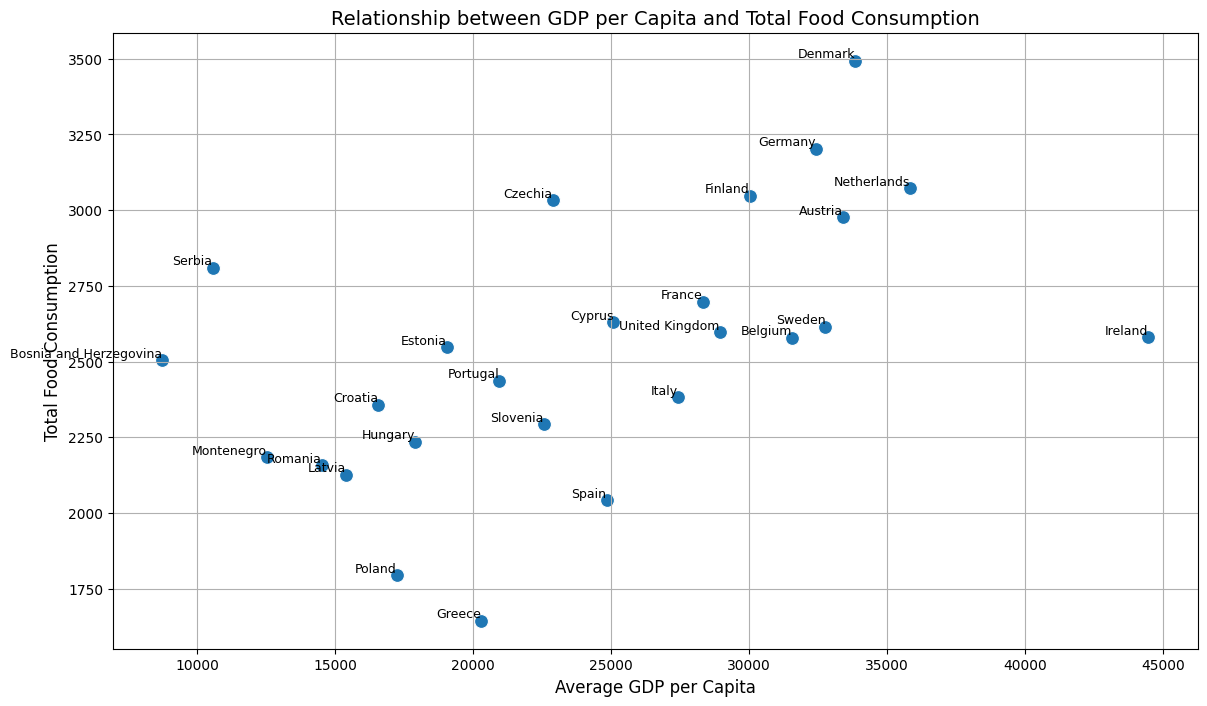

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Flatten MultiIndex columns
df_trade_copy = df_gdp_life_trade.copy()
df_trade_copy.columns = ['-'.join(col).strip() if isinstance(col, tuple) else col for col in df_trade_copy.columns]

# Step 2: Ensure '-GDP_PC' is numeric
df_trade_copy['-GDP_PC'] = pd.to_numeric(df_trade_copy['-GDP_PC'], errors='coerce')

# Step 3: Remove rows with NaN in '-GDP_PC'
df_trade_clean = df_trade_copy.dropna(subset=['-GDP_PC'])

# Step 4: Group by '-Country' and calculate the mean GDP per capita
df_gdp = df_trade_clean.groupby('-Country', as_index=False)['-GDP_PC'].mean()
df_gdp.rename(columns={'-GDP_PC': 'Average GDP Per Capita'}, inplace=True)

# Step 5: Merge with Food Consumption Data
df_combined_gdp_food = pd.merge(
    df_gdp,
    df_food_consumption.rename(columns={'Country': '-Country'})[['-Country', 'Total Food Consumption']],
    on='-Country',
    how='inner'
)

# Step 6: Correlation Analysis
# Compute correlation between GDP per capita and Total Food Consumption
correlation = df_combined_gdp_food[['Average GDP Per Capita', 'Total Food Consumption']].corr().iloc[0, 1]
print(f"Correlation between GDP per Capita and Total Food Consumption: {correlation:.2f}")

# Step 7: Visualization with Country Labels
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df_combined_gdp_food,
    x='Average GDP Per Capita',
    y='Total Food Consumption',
    s=100  # Size of scatter points
)

# Annotate each point with the country's name
for i in range(df_combined_gdp_food.shape[0]):
    plt.text(
        x=df_combined_gdp_food['Average GDP Per Capita'].iloc[i],
        y=df_combined_gdp_food['Total Food Consumption'].iloc[i],
        s=df_combined_gdp_food['-Country'].iloc[i],
        fontsize=9,  # Font size for annotations
        ha='right',  # Horizontal alignment
        va='bottom'  # Vertical alignment
    )

plt.title('Relationship between GDP per Capita and Total Food Consumption', fontsize=14)
plt.xlabel('Average GDP per Capita', fontsize=12)
plt.ylabel('Total Food Consumption', fontsize=12)
plt.grid(True)
plt.show()


## 9 ) Is there a relationship between the GDP per capita and the amount and type of food exported/imported

C:\Users\ghaza\AppData\Local\Temp\ipykernel_6164\3229363542.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trade_clean[col] = pd.to_numeric(df_trade_clean[col], errors='coerce')


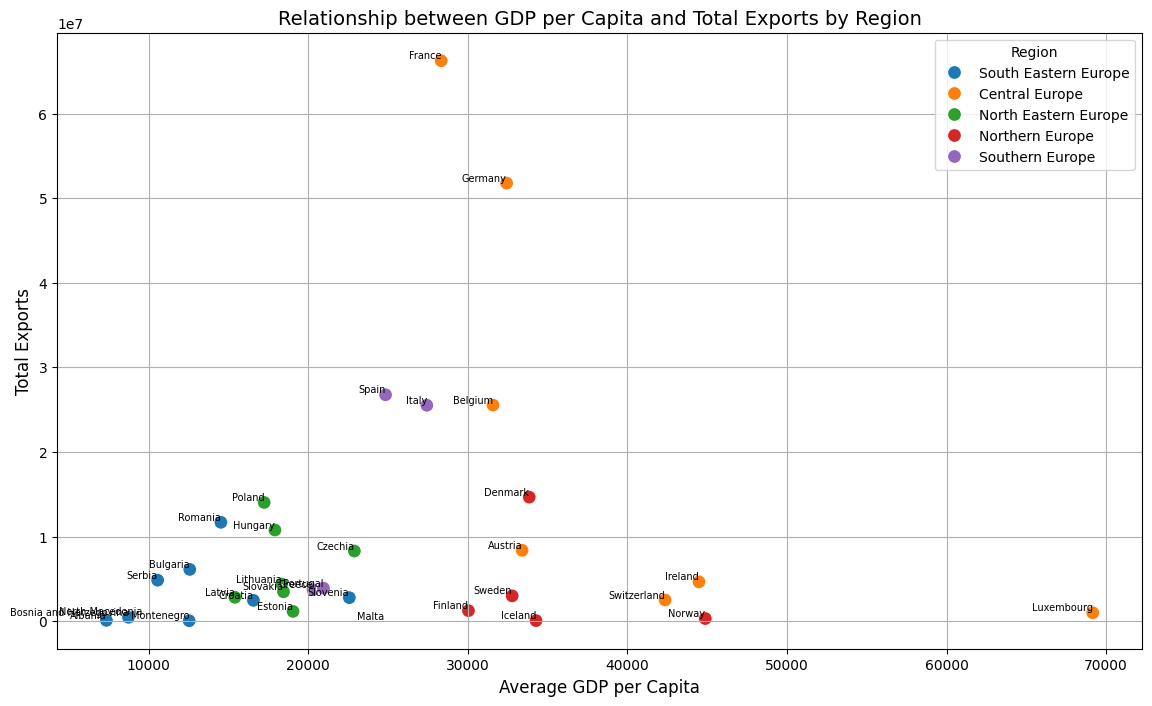

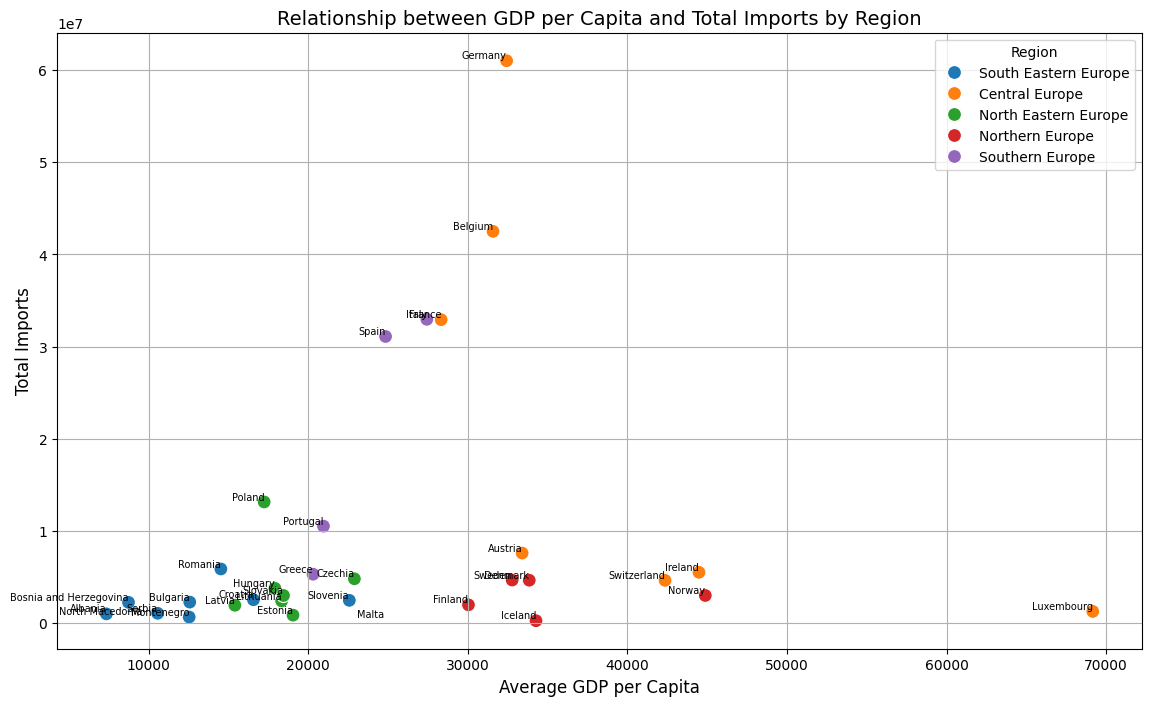

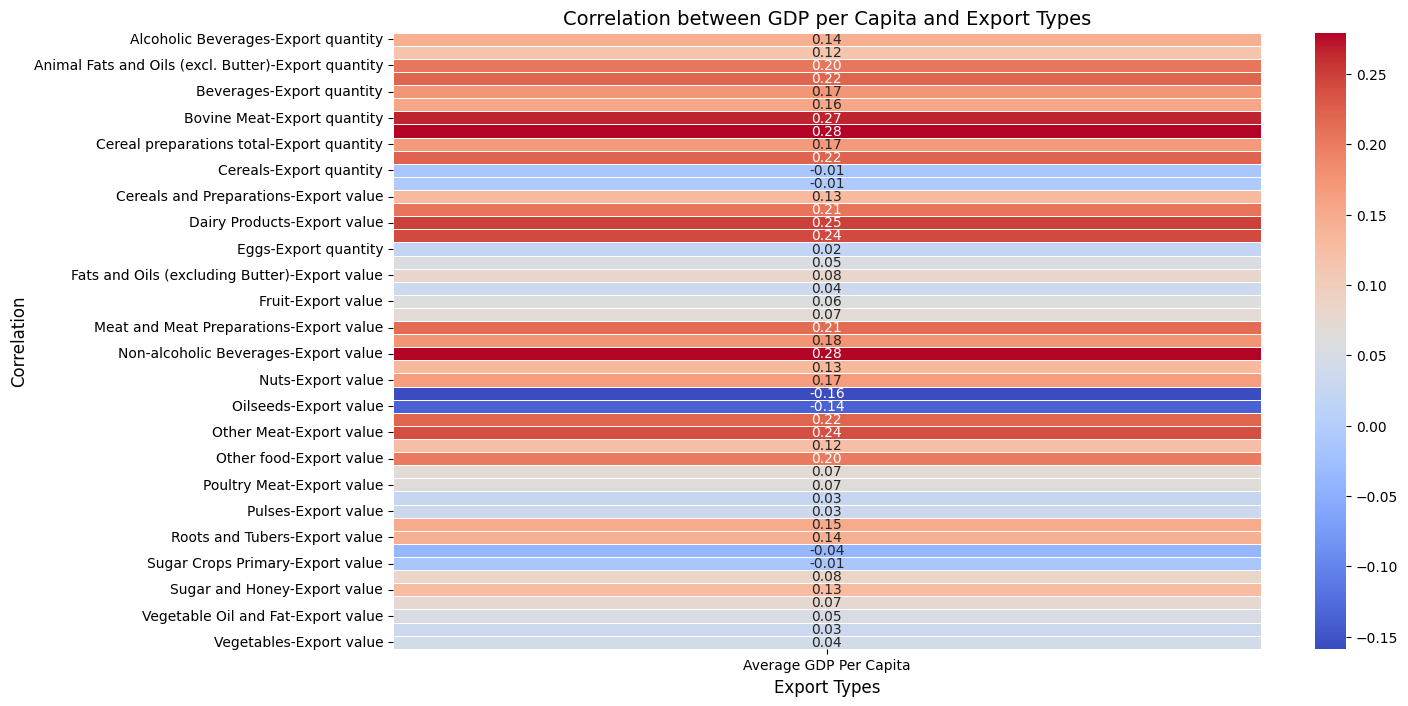

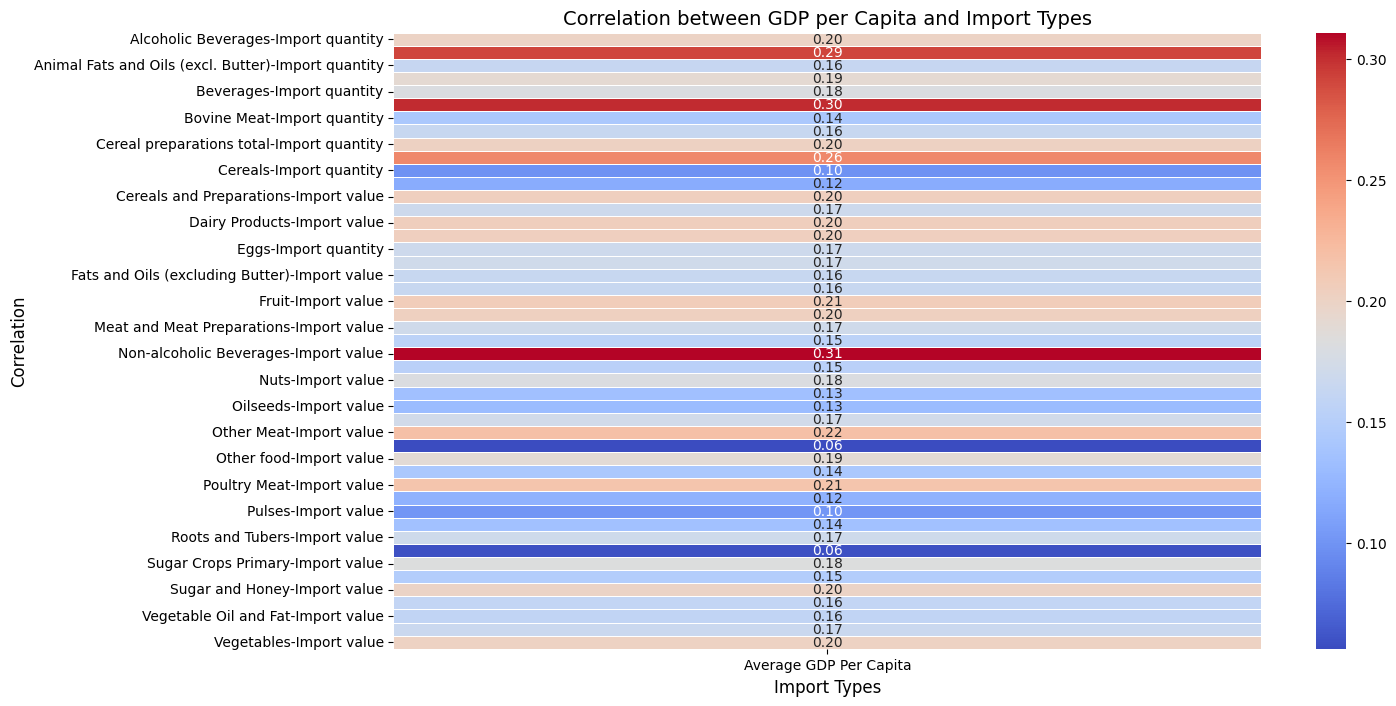

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Flatten MultiIndex columns
df_trade_copy = df_gdp_life_trade.copy()
df_trade_copy.columns = ['-'.join(col).strip() if isinstance(col, tuple) else col for col in df_trade_copy.columns]

# Step 2: Remove rows with non-numeric or NaN values in GDP per capita
df_trade_copy['-GDP_PC'] = pd.to_numeric(df_trade_copy['-GDP_PC'], errors='coerce')  # Convert to numeric
df_trade_clean = df_trade_copy.dropna(subset=['-GDP_PC'])  # Drop rows with NaN in '-GDP_PC'

# Step 3: Group by '-Country' and calculate the mean GDP per capita
df_gdp = df_trade_clean.groupby('-Country', as_index=False)['-GDP_PC'].mean()
df_gdp.rename(columns={'-GDP_PC': 'Average GDP Per Capita'}, inplace=True)



## dorooooooooooooooooooooooooooosteeeeeeeeeeeeeeeeeeeeeeeeeeeeee


# Step 4: Aggregate export/import data
# Identify import/export columns
export_columns = [col for col in df_trade_copy.columns if 'Export' in col]
import_columns = [col for col in df_trade_copy.columns if 'Import' in col]
for col in export_columns + import_columns:
    df_trade_clean[col] = pd.to_numeric(df_trade_clean[col], errors='coerce')
df_trade_copy = df_trade_clean.dropna(subset=export_columns + import_columns, how='all')
# Group by '-Country' and calculate the mean for export/import-related columns
df_aggregated_trade = df_trade_copy.groupby('-Country', as_index=False)[export_columns + import_columns].mean()

# Step 5: Calculate total exports and imports for each country
df_aggregated_trade['Total Exports'] = df_aggregated_trade[[col for col in export_columns if 'quantity' in col]].sum(axis=1)
df_aggregated_trade['Total Imports'] = df_aggregated_trade[[col for col in import_columns if 'quantity' in col]].sum(axis=1)

# Step 6: Merge GDP and trade data
df_combined_gdp_trade = pd.merge(df_gdp, df_aggregated_trade, on='-Country', how='inner')


df_combined_gdp_trade['Region'] = df_combined_gdp_trade['-Country'].map(region_mapping)

# Step 8: Scatterplots
# Scatterplot for GDP per Capita vs Total Exports with Country Labels and Region Coloring
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df_combined_gdp_trade,
    x='Average GDP Per Capita',
    y='Total Exports',
    hue='Region',
    palette='tab10',
    s=100
)
for i in range(df_combined_gdp_trade.shape[0]):
    plt.text(
        x=df_combined_gdp_trade['Average GDP Per Capita'].iloc[i],
        y=df_combined_gdp_trade['Total Exports'].iloc[i],
        s=df_combined_gdp_trade['-Country'].iloc[i],
        fontsize=7,
        ha='right',
        va='bottom'
    )
plt.title('Relationship between GDP per Capita and Total Exports by Region', fontsize=14)
plt.xlabel('Average GDP per Capita', fontsize=12)
plt.ylabel('Total Exports', fontsize=12)
plt.legend(title='Region', fontsize=10)
plt.grid(True)
plt.show()

# Scatterplot for GDP per Capita vs Total Imports with Country Labels and Region Coloring
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df_combined_gdp_trade,
    x='Average GDP Per Capita',
    y='Total Imports',
    hue='Region',
    palette='tab10',
    s=100
)
for i in range(df_combined_gdp_trade.shape[0]):
    plt.text(
        x=df_combined_gdp_trade['Average GDP Per Capita'].iloc[i],
        y=df_combined_gdp_trade['Total Imports'].iloc[i],
        s=df_combined_gdp_trade['-Country'].iloc[i],
        fontsize=7,
        ha='right',
        va='bottom'
    )
plt.title('Relationship between GDP per Capita and Total Imports by Region', fontsize=14)
plt.xlabel('Average GDP per Capita', fontsize=12)
plt.ylabel('Total Imports', fontsize=12)
plt.legend(title='Region', fontsize=10)
plt.grid(True)
plt.show()
# Heatmap for correlation with export types
plt.figure(figsize=(14, 8))
sns.heatmap(df_combined_gdp_trade[['Average GDP Per Capita'] + export_columns].corr().iloc[1:, 0].to_frame(), annot=True, cmap='coolwarm', cbar=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation between GDP per Capita and Export Types', fontsize=14)
plt.xlabel('Export Types', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.show()

# Heatmap for correlation with import types
plt.figure(figsize=(14, 8))
sns.heatmap(df_combined_gdp_trade[['Average GDP Per Capita'] + import_columns].corr().iloc[1:, 0].to_frame(), annot=True, cmap='coolwarm', cbar=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation between GDP per Capita and Import Types', fontsize=14)
plt.xlabel('Import Types', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.show()

Finished datsets you can use: df_gdp_life_trade and df_nontime_data

## 4. Training models to answer some questions + Eval

When we first looked through the available datasets, we wanted to pick topics that would be both meaningful to analyze and feasible with machine learning. The obesity and diabetes risk analysis caught our attention since it connects food consumption patterns to public health outcomes - something that affects millions of people worldwide. For our second topic, we chose to build a regression model for GDP per capita prediction, as it seemed to be an interesting challenge to find some correlation between the food consumption/food related health issues and the economic strength of the countries. Though we hadn't done deep analysis yet, both datasets seemed to have good quality data and enough variables to work with. We basically tried to find a sweet spot between picking important real-world problems and making sure we had enough solid data to actually build useful models.

### 4.1 Obesity and diabetes risk analysis


#### 4.1.1 Is there a relationship between the obesity rate and food consumption?

In this section we will try to train to train a regression model that can estimate the Obesity rate for a ocutnry given only the specific food types on average consumed by adults in that country. Key will therefore not be to get a model that perfroms super well in terms of estimating the correct value but that we can get insights/importance rankings of the predictors, e.g. knowing which type of food possibly continues most towards a higher obesity rate?

In [339]:
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [340]:
def train_split(df: pd.DataFrame, target: str, random_state: int, train_fraction: float):

    predictors = df.columns.difference([target, "Country", "Region", "Overweight in %", "Obese in %", "Diabetes Prevalence in %"])
    X = df[predictors]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        train_size=train_fraction,
        random_state=random_state
    )
    
    return X_train, X_test, y_train, y_test

In [341]:
def train_model(model_type: type, X_train: pd.DataFrame, y_train: pd.DataFrame):

    trained_model = model_type()
    trained_model.fit(X_train, y_train)
    return trained_model

def predict_target(trained_model, X_valid: pd.DataFrame) -> np.ndarray:

    y_pred = trained_model.predict(X_valid)
    return y_pred

def calculate_rmse(y_true: np.ndarray, y_pred: np.ndarray) -> float:

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return rmse

In [342]:
X_train, X_test, y_train, y_test = train_split(
    df=df_nontime_data, 
    target="Obese in %",  
    train_fraction=0.7,
    random_state=123
)

In [343]:
models = [
    ("Linear Regression", LinearRegression),
    ("Random Forest", RandomForestRegressor),
    ("Support Vector Regression", SVR)
]

In [344]:
def evaluate_models(models, X_train, X_test, y_train, y_test, model_params=None):

    results = {}

    for name, model_type in models:
        # Get parameters for the specific model, if any
        params = model_params.get(model_type, {})

        # Train the model with the provided parameters
        model = train_model(lambda: model_type(**params), X_train, y_train)

        # Predict on the test set
        y_pred = predict_target(model, X_test)

        # Calculate RMSE
        rmse = calculate_rmse(y_test, y_pred)

        # Store results
        results[name] = rmse
        print(f"{name} RMSE: {rmse:.2f}")
    
    return results

In [345]:
model_params = {RandomForestRegressor: {"random_state": 123}}

results = evaluate_models(models, X_train, X_test, y_train, y_test,model_params=model_params)

Linear Regression RMSE: 9.42
Random Forest RMSE: 4.05
Support Vector Regression RMSE: 2.59


In [346]:
def tune_and_train_rf(X_train, y_train, X_test, y_test, random_state=123):

    rf = RandomForestRegressor(random_state=random_state)

    rf_param_grid = {
    'n_estimators': [20, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
    
    grid_search = GridSearchCV(
        estimator=rf,
        param_grid=rf_param_grid,
        cv=5,  # 5-fold cross-validation
        scoring='neg_root_mean_squared_error',  # Use RMSE as scoring metric
        n_jobs=-1,
        verbose=3
    )

    grid_search.fit(X_train, y_train)

    # Get the best model and parameters
    best_rf = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print("Random Forest Best Parameters:", best_params)
    print("Random Forest Best CV Score (negative RMSE):", grid_search.best_score_)

    # Predict on the test set and calculate RMSE
    y_pred_test = best_rf.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    print(f"Random Forest Test RMSE: {rmse_test:.2f}")

    # Get feature importances from the best model
    feature_importances = best_rf.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
    print("Feature Importances:")
    print(importance_df)

    # Return results
    return {
        "best_model": best_rf,
        "best_params": best_params,
        "rmse_test": rmse_test,
        "feature_importances": importance_df
    }

In [347]:
results = tune_and_train_rf(
    X_train=X_train, 
    y_train=y_train, 
    X_test=X_test, 
    y_test=y_test, 
    random_state=123
)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Random Forest Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
Random Forest Best CV Score (negative RMSE): -4.592204583039033
Random Forest Test RMSE: 4.54
Feature Importances:
                                              Feature  Importance
3                    Coffee, cocoa, tea and infusions    0.246547
20                  Vegetables and vegetable products    0.177773
5                               Eggs and egg products    0.119367
11                 Legumes, nuts, oilseeds and spices    0.117585
10                    Grains and grain-based products    0.058060
9   Fruit and vegetable juices and nectars (includ...    0.053517
17                   Seasoning, sauces and condiments    0.051694
15                            Milk and dairy products    0.045932
4                                    Composite dishes    0.032602
0                                 Alcoholic 

#### 4.1.2 Is there a relationship between the prevelance of diabetes and food consumption?

In [348]:
X_train, X_test, y_train, y_test = train_split(
    df=df_nontime_data, 
    target="Diabetes Prevalence in %",  
    train_fraction=0.7,
    random_state=123
)

In [349]:
model_params = {RandomForestRegressor: {"random_state": 123}}

results = evaluate_models(models, X_train, X_test, y_train, y_test,model_params=model_params)

Linear Regression RMSE: 2.74
Random Forest RMSE: 2.23
Support Vector Regression RMSE: 1.72


In [350]:
results_1 = tune_and_train_rf(
    X_train=X_train, 
    y_train=y_train, 
    X_test=X_test, 
    y_test=y_test, 
    random_state=123
)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Random Forest Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
Random Forest Best CV Score (negative RMSE): -1.3999392967875277
Random Forest Test RMSE: 2.43
Feature Importances:
                                              Feature  Importance
7                  Food products for young population    0.310529
20                  Vegetables and vegetable products    0.102563
18  Starchy roots or tubers and products thereof, ...    0.085903
0                                 Alcoholic beverages    0.077629
11                 Legumes, nuts, oilseeds and spices    0.060748
4                                    Composite dishes    0.057237
12                                    Life Expectancy    0.057077
10                    Grains and grain-based products    0.046918
14                             Meat and meat products    0.046030
8                            Fruit and frui

#### 4.1.3 Is there a relationship between the life expectancy and food consumption?

In [351]:
X_train, X_test, y_train, y_test = train_split(
    df=df_nontime_data, 
    target="Life Expectancy",  
    train_fraction=0.7,
    random_state=123
)

In [352]:
model_params = {RandomForestRegressor: {"random_state": 123}}

results = evaluate_models(models, X_train, X_test, y_train, y_test,model_params=model_params)

Linear Regression RMSE: 4.22
Random Forest RMSE: 1.84
Support Vector Regression RMSE: 2.65


In [353]:
results_1 = tune_and_train_rf(
    X_train=X_train, 
    y_train=y_train, 
    X_test=X_test, 
    y_test=y_test, 
    random_state=123
)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Random Forest Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Best CV Score (negative RMSE): -2.186972515644828
Random Forest Test RMSE: 1.84
Feature Importances:
                                              Feature  Importance
0                                 Alcoholic beverages    0.240655
13                             Meat and meat products    0.171024
5                               Eggs and egg products    0.119712
6                                    Fish and seafood    0.094137
15  Products for non-standard diets, food imitates...    0.084732
18  Sugar and similar, confectionery and water-bas...    0.067712
11                 Legumes, nuts, oilseeds and spices    0.033899
7                  Food products for young population    0.028988
1   Amphibians, reptiles, and terrestrial inverteb...    0.026881
8                            Fruit and frui

### 4.2 Predict GDP per capita based on life expectancy and import/export values

#### 4.2.1 Load and transform the data, create training and test splits

In [354]:
df_gdp_life_trade.head()

Alcoholic Beverages               \
   Country  Year GDP_PC Life Expectancy     Export quantity Export value   
0  Albania  2000   3200            76.2                26.0         35.0   
1  Albania  2001   3600            76.3                35.0         52.0   
2  Albania  2002   3800            76.4                70.0         64.0   
3  Albania  2003   4100            76.6               130.0        167.0   
4  Albania  2004   4400            76.7               320.0        265.0   

                               Animal Fats and Oils (excl. Butter)  \
  Import quantity Import value                     Export quantity   
0         33354.0      12533.0                                 0.0   
1         37187.0      15916.0                                 0.0   
2         29474.0      15730.0                                 0.0   
3         28265.0      18193.0                                 0.0   
4         24729.0      18678.0                                 0.0   

                ... Sugar and Honey              Vegetable Oil and Fat  \
  Export value  ... Import quantity Import value       Export quantity   
0          0.0  ...         59993.0      15406.0                  39.0   
1          0.0  ...         57437.0      15304.0                   5.0   
2          0.0  ...         67945.0      18361.0                  14.0   
3          0.0  ...         66291.0      18335.0                 200.0   
4          0.0  ...         83846.0      18776.0                 281.0   

                                                 Vegetables               \
  Export value Import quantity Import value Export quantity Export value   
0         45.0         35803.0      20150.0           789.0        514.0   
1          4.0         36855.0      18847.0           585.0        596.0   
2         11.0         34706.0      21262.0           972.0        724.0   
3        326.0         40214.0      28600.0          1116.0        502.0   
4        339.0         40055.0      32319.0          2003.0       1699.0   

                                
  Import quantity Import value  
0         21762.0       6589.0  
1         21847.0       8500.0  
2         33755.0      11428.0  
3         33928.0      13102.0  
4         23576.0      15339.0  

[5 rows x 98 columns]

As already mentioned, predicting GDP per capita based on life expectancy, and import/export metrics seemed like an interesting topic, and in general we expect to have a correlation between these numbers. For this to work we first need to transform the dataset into the correct format and create train and test splits. As a first step we transform the dataset a bit and do some feature engineering to add some extra columns that might enhance the performance of our regressor models. These are average export and import, and trade balace which equals to the difference of these two.

In [355]:
df_aggregated = df_gdp_life_trade.copy()

# Reset the multi index to easier work with the dataframe
df_aggregated.columns = [
    '_'.join(col).strip() if isinstance(col, tuple) else col
    for col in df_aggregated.columns
]

# Fix the column names that got messed up
df_aggregated.rename(columns={
    '_Country': 'Country',
    '_Year': 'Year',
    '_GDP_PC': 'GDP_PC',
    '_Life Expectancy': 'Life_Expectancy'
}, inplace=True)

# Calculate average import and export values to add some new columns that might be beneficial for the trained regressors
df_aggregated['Avg_Import_Value'] = df_aggregated.filter(like='Import value').mean(axis=1)
df_aggregated['Avg_Export_Value'] = df_aggregated.filter(like='Export value').mean(axis=1)

# Calculate trade balance (exports minus imports) for the same reason
df_aggregated['Trade_Balance'] = df_aggregated['Avg_Export_Value'] - df_aggregated['Avg_Import_Value']

df_aggregated.head()

Country  Year GDP_PC  Life_Expectancy  Alcoholic Beverages_Export quantity  \
0  Albania  2000   3200             76.2                                 26.0   
1  Albania  2001   3600             76.3                                 35.0   
2  Albania  2002   3800             76.4                                 70.0   
3  Albania  2003   4100             76.6                                130.0   
4  Albania  2004   4400             76.7                                320.0   

   Alcoholic Beverages_Export value  Alcoholic Beverages_Import quantity  \
0                              35.0                              33354.0   
1                              52.0                              37187.0   
2                              64.0                              29474.0   
3                             167.0                              28265.0   
4                             265.0                              24729.0   

   Alcoholic Beverages_Import value  \
0                           12533.0   
1                           15916.0   
2                           15730.0   
3                           18193.0   
4                           18678.0   

   Animal Fats and Oils (excl. Butter)_Export quantity  \
0                                                0.0     
1                                                0.0     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Animal Fats and Oils (excl. Butter)_Export value  ...  \
0                                               0.0  ...   
1                                               0.0  ...   
2                                               0.0  ...   
3                                               0.0  ...   
4                                               0.0  ...   

   Vegetable Oil and Fat_Export value  Vegetable Oil and Fat_Import quantity  \
0                                45.0                                35803.0   
1                                 4.0                                36855.0   
2                                11.0                                34706.0   
3                               326.0                                40214.0   
4                               339.0                                40055.0   

   Vegetable Oil and Fat_Import value  Vegetables_Export quantity  \
0                             20150.0                       789.0   
1                             18847.0                       585.0   
2                             21262.0                       972.0   
3                             28600.0                      1116.0   
4                             32319.0                      2003.0   

   Vegetables_Export value  Vegetables_Import quantity  \
0                    514.0                     21762.0   
1                    596.0                     21847.0   
2                    724.0                     33755.0   
3                    502.0                     33928.0   
4                   1699.0                     23576.0   

   Vegetables_Import value  Avg_Import_Value  Avg_Export_Value  Trade_Balance  
0                   6589.0      14383.576923        325.307692  -14058.269231  
1                   8500.0      15403.307692        282.461538  -15120.846154  
2                  11428.0      17877.192308        300.000000  -17577.192308  
3                  13102.0      21300.307692        452.346154  -20847.961538  
4                  15339.0      26300.153846        954.615385  -25345.538462  

[5 rows x 101 columns]

There are some extra countries that are not contained in all fo the datasets, the gdp and life expectancy is unfortunately missing for these, therefore we will drop them in the next steps.

In [356]:
countries_to_drop = [
   'Bosnia and Herzegovina', 'Cyprus', 'Faroe Islands',
   'Republic of Moldova', 'Russian Federation',
   'Serbia and Montenegro', 'Türkiye'
]

df_aggregated = df_aggregated[~df_aggregated['Country'].isin(countries_to_drop)]
df_aggregated['Country'].unique()

array(['Albania', 'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Croatia',
       'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia',
       'Lithuania', 'Luxembourg', 'Malta', 'Montenegro', 'Netherlands',
       'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania',
       'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'Ukraine', 'United Kingdom'], dtype=object)

In [357]:
df_aggregated.isna().sum()

Country                                 0
Year                                    0
GDP_PC                                 48
Life_Expectancy                        48
Alcoholic Beverages_Export quantity    12
                                       ..
Vegetables_Import quantity             12
Vegetables_Import value                12
Avg_Import_Value                       12
Avg_Export_Value                       12
Trade_Balance                          12
Length: 101, dtype: int64

In [358]:
df_aggregated = df_aggregated.dropna()
df_aggregated.isna().sum()

Country                                0
Year                                   0
GDP_PC                                 0
Life_Expectancy                        0
Alcoholic Beverages_Export quantity    0
                                      ..
Vegetables_Import quantity             0
Vegetables_Import value                0
Avg_Import_Value                       0
Avg_Export_Value                       0
Trade_Balance                          0
Length: 101, dtype: int64

We are under the impression that encoding the country column could have a strong influence on the prediction (Since some countries have always had higher GDP, import/export and life expectancy values than others), therefore we will shuffle the dataframe and then drop this column.

In [359]:
df_aggregated = df_aggregated.sample(frac=1, random_state=42).reset_index(drop=True)
df_aggregated = df_aggregated.drop('Country', axis=1)

#Change column order
cols = [col for col in df_aggregated.columns if col != 'GDP_PC'] + ['GDP_PC']
df_aggregated = df_aggregated[cols]

df_aggregated.head()

Year  Life_Expectancy  Alcoholic Beverages_Export quantity  \
0  2000             72.1                              1507.00   
1  2001             74.6                             39903.00   
2  2016             74.9                            167225.35   
3  2014             81.3                            579155.41   
4  2009             73.7                             31081.00   

   Alcoholic Beverages_Export value  Alcoholic Beverages_Import quantity  \
0                           1392.00                             26327.00   
1                          25967.00                             31921.00   
2                         249774.46                            182208.51   
3                        1335869.13                            306637.65   
4                          39802.00                             42227.00   

   Alcoholic Beverages_Import value  \
0                          23487.00   
1                          22591.00   
2                         315458.44   
3                         361175.82   
4                          97763.00   

   Animal Fats and Oils (excl. Butter)_Export quantity  \
0                                            1170.00     
1                                            5396.00     
2                                            6143.77     
3                                           16522.99     
4                                            1727.00     

   Animal Fats and Oils (excl. Butter)_Export value  \
0                                            312.00   
1                                           1297.00   
2                                           5299.02   
3                                          14423.69   
4                                           1046.00   

   Animal Fats and Oils (excl. Butter)_Import quantity  \
0                                            5620.00     
1                                            5052.00     
2                                           11843.73     
3                                           14332.11     
4                                           38675.00     

   Animal Fats and Oils (excl. Butter)_Import value  ...  \
0                                           3187.00  ...   
1                                           3466.00  ...   
2                                          10671.20  ...   
3                                          23417.08  ...   
4                                          38659.00  ...   

   Vegetable Oil and Fat_Import quantity  Vegetable Oil and Fat_Import value  \
0                               56088.00                            29187.00   
1                               22964.00                            14442.00   
2                              185570.93                           173281.50   
3                              361156.88                           587655.98   
4                              163996.00                           171638.00   

   Vegetables_Export quantity  Vegetables_Export value  \
0                    19496.00                 30190.00   
1                     6065.00                  7629.00   
2                   192886.69                153159.15   
3                   647498.80                649022.92   
4                    40515.00                 59216.00   

   Vegetables_Import quantity  Vegetables_Import value  Avg_Import_Value  \
0                    51880.00                 34651.00      26017.615385   
1                    67905.00                 40749.00      40240.384615   
2                   248423.37                232089.13     166149.438462   
3                   358013.37                365500.67     578895.027692   
4                   253848.00                217146.00     248489.730769   

   Avg_Export_Value  Trade_Balance   GDP_PC  
0      22631.615385   -3386.000000     7000  
1      17133.384615  -23107.000000     9600  
2     222790.744231   56641.305769  21400.0  
3     402490.157692 -176404.870000  20600.0  
4     166358.

We have noticed that 6 rows still contain a ':' char, we will drop these rows for simplicity.

In [360]:
for column in df_aggregated.columns:
    if df_aggregated[column].astype(str).str.contains(':').any():
        print(f"Column {column} contains ':'")

count = sum(df_aggregated[column].astype(str).str.contains(':').any() for column in df_aggregated.columns)
print(f"Number of columns containing ':': {count}")

count = df_aggregated.astype(str).apply(lambda x: x.str.contains(':')).sum().sum()
print(f"Number of rows containing ':': {count}")

df_aggregated = df_aggregated[~df_aggregated.astype(str).apply(lambda x: x.str.contains(':')).any(axis=1)]

print(f"DataFrame shape after dropping rows: {df_aggregated.shape}")

Number of columns containing ':': 0
Number of rows containing ':': 0
DataFrame shape after dropping rows: (756, 100)


Now we will create two new datasets, one where we drop gdp per capita and one where we drop the life expectancy. We do this because the two columns are highly correlated and we aim to see wether the import/Export data is sufficient to predict the values we are looking for. Afterwards we create train/test splits, first let'S do a 70-30 train-test split, and later on we will explore some other options if the results are good enough and it is sensible to further explore. For our experiments we decided to use scikit-learn as this is the one thought on class and the libraryy we are most familiar with.

In [361]:
df_aggregated_gdp = df_aggregated.drop(columns=['Life_Expectancy'])
df_aggregated_life = df_aggregated.drop(columns=['GDP_PC'])

Later on during the training we noticed some exceptionally high error values and we decided to try log transforming the gdp per capita to see if it resolves the issue. (this did not work)

In [362]:
# # First convert to float
# df_aggregated_gdp['GDP_PC'] = df_aggregated_gdp['GDP_PC'].astype(float)

# # Then apply log transformation
# df_aggregated_gdp['GDP_PC'] = np.log(df_aggregated_gdp['GDP_PC'])

In [363]:
import typing
from sklearn.model_selection import train_test_split

def split_data(df: pd.DataFrame, test_size: float=0.3) -> typing.Tuple[pd.DataFrame, pd.DataFrame]:

    df_train, df_test = train_test_split(df, random_state=123, test_size=test_size)
    
    return df_train, df_test

In [364]:
df_train_gdp, df_test_gdp = split_data(df_aggregated_gdp)
df_train_life, df_test_life = split_data(df_aggregated_life)

#### 4.2.2 Train and test the models

In this section we select a few different regressor models and metrix and explore how well the base models perform on the datasets, without adjusting any parameters.

Selected models:
- Linear Regression
- Random Forest Regressor
- Gradient Boosting Regressor
- Support Vector Regressor

Selected metrics:
- R2
- Mean squared error
- Mean absolute error
- Root mean squared error

For the type of problem that we defined we need regressor models. The selected models are well-suited for predicting GDP per capita and life expectancy because they handle the type of relationships we typically see in economic and demographic data. We are expecting a particularly good result from the random forest as we already know this model and  have seen it performing really well on different datasets, even though the way it works is really simple. On the other hand it's our first time trying the GBR and SVR so we are also excited about their performance.
As for the metrics, they each tell us something valuable about our predictions. R2 gives us a general sense of how well our model explains the variations in GDP and life expectancy across countries. Mean squared error and root mean squared error are especially sensitive to large prediction errors, which is crucial when we're dealing with GDP predictions where being off by a lot for major economies would be a serious problem. Mean absolute error gives us a more intuitive measure - it tells us, on average, how many dollars or years our predictions are off by, which is something that everyone can easily understand and work with.

In [365]:
def create_dataset_gdp(df:pd.DataFrame, valid_size: float, random_state) -> typing.Tuple[pd.DataFrame, pd.Series, pd.DataFrame, pd.Series]:
    X_train = None
    X_valid = None
    y_train = None
    y_valid = None
    
    df_train, df_valid = train_test_split(df, random_state=random_state, test_size=valid_size)

    X_train = df_train.drop(columns=['GDP_PC'])
    y_train = df_train['GDP_PC']
    X_valid = df_valid.drop(columns=['GDP_PC'])
    y_valid = df_valid['GDP_PC']

    return X_train, y_train, X_valid, y_valid

def create_dataset_life(df:pd.DataFrame, valid_size: float, random_state) -> typing.Tuple[pd.DataFrame, pd.Series, pd.DataFrame, pd.Series]:
    X_train = None
    X_valid = None
    y_train = None
    y_valid = None
    
    df_train, df_valid = train_test_split(df, random_state=random_state, test_size=valid_size)

    X_train = df_train.drop(columns=['Life_Expectancy'])
    y_train = df_train['Life_Expectancy']
    X_valid = df_valid.drop(columns=['Life_Expectancy'])
    y_valid = df_valid['Life_Expectancy']

    return X_train, y_train, X_valid, y_valid

In [366]:
X_train_gdp, y_train_gdp, X_valid_gdp, y_valid_gdp = create_dataset_gdp(df_train_gdp, valid_size=0.2, random_state=123)
X_train_life, y_train_life, X_valid_life, y_valid_life = create_dataset_life(df_train_life, valid_size=0.2, random_state=123)

In [367]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

suitable_ml_methods = [
    LinearRegression,
    RandomForestRegressor,
    GradientBoostingRegressor, 
    SVR
]

In [368]:
from sklearn.base import ClassifierMixin

def train_model(model_type: type, X_train: pd.DataFrame, y_train: pd.DataFrame):
    if model_type == SVR:
        trained_model = model_type(kernel='linear')
    else:
        trained_model = model_type()
    trained_model.fit(X_train, y_train)
    return trained_model

def predict_values(trained_model, X_valid: pd.DataFrame) -> np.ndarray:
    return trained_model.predict(X_valid)

In [369]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

def compare_metrics(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> dict:
    scores = {}
    scores['r2_score'] = r2_score(y_true, y_pred)
    scores['mean_squared_error'] = mean_squared_error(y_true, y_pred)
    scores['mean_absolute_error'] = mean_absolute_error(y_true, y_pred)
    scores['root_mean_squared_error'] = root_mean_squared_error(y_true, y_pred)
    return scores

def print_scores(scores: dict):
  print("\nScores:\n=======")
  for metric_name, metric_value in scores.items():
    print(f"{metric_name}: {metric_value}")

In [370]:
model_idx_gdp = 1  # Try different indices for different models
model_class_gdp = suitable_ml_methods[model_idx_gdp]
print(f"Using model: {model_class_gdp.__name__}")

trained_model_gdp = train_model(model_class_gdp, X_train_gdp, y_train_gdp)
y_pred_gdp = predict_values(trained_model_gdp, X_valid_gdp)
metrics_scores_gdp = compare_metrics(y_valid_gdp, y_pred_gdp)
print_scores(metrics_scores_gdp)

print("\n")
model_idx_life = 2  # Try different indices for different models
model_class_life = suitable_ml_methods[model_idx_life]
print(f"Using model: {model_class_life.__name__}")

trained_model_life = train_model(model_class_life, X_train_life, y_train_life)
y_pred_life = predict_values(trained_model_life, X_valid_life)
metrics_scores_life = compare_metrics(y_valid_life, y_pred_life)
print_scores(metrics_scores_life)

Using model: RandomForestRegressor

Scores:
r2_score: 0.9554045238361354
mean_squared_error: 10223182.254716981
mean_absolute_error: 2031.311320754717
root_mean_squared_error: 3197.37114747678


Using model: GradientBoostingRegressor

Scores:
r2_score: 0.9343358858712286
mean_squared_error: 0.7014431071452369
mean_absolute_error: 0.5892225936917195
root_mean_squared_error: 0.8375220039767534


After trying all the different variations for both datasets, the best results we got are from the RFC on the gdp data and GBR for the life expectancy data.
The Random Forest Regressor performed the best by far, and it shows promising results, however the MSE is really higs. The Mean Absolute Error on the other hand is only ~2000$ which is acceptable in case of countries with high GDP per capita. On the other hand some countlis such as albania have a value around 8000$ for 2023 and even lower values in the past, so for these such a difference is way too high. Let's see if we can get it better with some scaling.
However, the metrics expose an important challenge: while the model performs well overall, it struggles with the huge variations in GDP per capita across countries. The high mean squared error (around 10 million) is showing us it's inflated because the model makes some large errors, likely when predicting values for very wealthy nations or nations on the lower end. 
The Gradient Boosting Regressor's metrics for life expectancy actually look quite impressive. An R² of 0.93 indicates the model explains 93% of the variance in life expectancy across countries. The mean absolute error of about 0.59 years is pretty good - it means on average, the model's predictions are off by only about 7 months.

#### 4.2.3 Explore different scaling approaches

In order to try to reduce the exceptionally high errors, we try a few scaling approaches, but knowing the models we do not expect too much improvement as they are usually not so sensitive about scaling. In addition we tried to do some log scaling on the gdp per capita, but unfortunately this did not make our predictions any better so we ended up discarding it.

In [371]:
from sklearn.pipeline import make_pipeline

def fit_pipeline(X_train:pd.DataFrame, 
                    y_train:pd.DataFrame, 
                    X_valid:pd.DataFrame, 
                    y_valid:pd.DataFrame, 
                    model_class: type, 
                    scaler_class:type):
  score = 0.0
  pipeline = make_pipeline(scaler_class(), model_class())
  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_valid)
  score = compare_metrics(y_valid, y_pred)
    
  return score


def compare_scaling(X_train:pd.DataFrame, 
                    y_train:pd.DataFrame, 
                    X_valid:pd.DataFrame, 
                    y_valid:pd.DataFrame, 
                    model_class: type):
    scores = {}

    #Scalers: StandardScaler, MinMaxScaler, MaxAbsScaler
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import MaxAbsScaler
    from sklearn.preprocessing import RobustScaler

    scores['StandardScaler'] = fit_pipeline(X_train, y_train, X_valid, y_valid, model_class, StandardScaler)
    scores['MinMaxScaler'] = fit_pipeline(X_train, y_train, X_valid, y_valid, model_class, MinMaxScaler)
    scores['MaxAbsScaler'] = fit_pipeline(X_train, y_train, X_valid, y_valid, model_class, MaxAbsScaler)
    scores['RobustScaler'] = fit_pipeline(X_train, y_train, X_valid, y_valid, model_class, RobustScaler)

    return scores

In [372]:
model_idx_gdp = 1

choosen_model_class_gdp = suitable_ml_methods[model_idx_gdp]
print(f"Choosen model: {choosen_model_class_gdp.__name__}")

scaling_scores_gdp = compare_scaling(X_train_gdp, y_train_gdp, X_valid_gdp, y_valid_gdp, choosen_model_class_gdp)
print_scores(scaling_scores_gdp)

print("\n")
model_idx_life = 2
choosen_model_class_life = suitable_ml_methods[model_idx_life]
print(f"Choosen model: {choosen_model_class_life.__name__}")
scaling_scores_life = compare_scaling(X_train_life, y_train_life, X_valid_life, y_valid_life, choosen_model_class_life)
print_scores(scaling_scores_life)

Choosen model: RandomForestRegressor

Scores:
StandardScaler: {'r2_score': 0.9583607870181903, 'mean_squared_error': 9545480.839622641, 'mean_absolute_error': 2072.7075471698113, 'root_mean_squared_error': 3089.576158572991}
MinMaxScaler: {'r2_score': 0.9604506742852463, 'mean_squared_error': 9066389.679245284, 'mean_absolute_error': 1933.7358490566037, 'root_mean_squared_error': 3011.044615950631}
MaxAbsScaler: {'r2_score': 0.9604770164059194, 'mean_squared_error': 9060350.943396226, 'mean_absolute_error': 1947.4905660377358, 'root_mean_squared_error': 3010.0416846608996}
RobustScaler: {'r2_score': 0.9608542643018677, 'mean_squared_error': 8973869.660377359, 'mean_absolute_error': 1884.7735849056603, 'root_mean_squared_error': 2995.641777712642}


Choosen model: GradientBoostingRegressor

Scores:
StandardScaler: {'r2_score': 0.9324213517156386, 'mean_squared_error': 0.7218947161351815, 'mean_absolute_error': 0.5955330189478705, 'root_mean_squared_error': 0.8496438760652498}
MinMaxScal

The relatively small impact of scaling suggests that both these models are already handling the different scales of features reasonably well. This is particularly true for Random Forest, which is generally scale-invariant. Unfortunately the problem with the exceptionally high error for the gdp dataset did not get solved.

#### 4.2.4 Experiment with different train/validation splits

Now we will checka few different training/validation splits just to see if the model is sensitive to different splits or not.

In [373]:
def compare_train_valid_splits_gdp(df:pd.DataFrame) -> typing.Dict[str, float]:
    scores = {}
    splits={0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6}
    model_idx = 1
    choosen_model_class = suitable_ml_methods[model_idx]
    print(f"Choosen model: {choosen_model_class.__name__}")
    
    for split in splits:
        X_train, y_train, X_valid, y_valid = create_dataset_gdp(df, valid_size=split, random_state=123)
        trained_model = train_model(choosen_model_class, X_train, y_train)
        y_pred = predict_values(trained_model, X_valid)
        scores[f'Split {split}/{1-split}: '] = compare_metrics(y_valid, y_pred)
    
    return scores

def compare_train_valid_splits_life(df:pd.DataFrame) -> typing.Dict[str, float]:
    scores = {}
    splits={0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6}
    model_idx = 2
    choosen_model_class = suitable_ml_methods[model_idx]
    print(f"Choosen model: {choosen_model_class.__name__}")
    
    for split in splits:
        X_train, y_train, X_valid, y_valid = create_dataset_life(df, valid_size=split, random_state=123)
        trained_model = train_model(choosen_model_class, X_train, y_train)
        y_pred = predict_values(trained_model, X_valid)
        scores[f'Split {split}/{1-split}: '] = compare_metrics(y_valid, y_pred)
    
    return scores

In [374]:
split_scores_gdp = compare_train_valid_splits_gdp(df_train_gdp)

print_scores(split_scores_gdp)

split_scores_life = compare_train_valid_splits_life(df_train_life)

print_scores(split_scores_life)

Choosen model: RandomForestRegressor

Scores:
Split 0.1/0.9: : {'r2_score': 0.9674774578566027, 'mean_squared_error': 7631454.226415094, 'mean_absolute_error': 1774.3396226415093, 'root_mean_squared_error': 2762.5086835003967}
Split 0.2/0.8: : {'r2_score': 0.956072361530118, 'mean_squared_error': 10070085.41509434, 'mean_absolute_error': 2040.1132075471698, 'root_mean_squared_error': 3173.33978878631}
Split 0.15/0.85: : {'r2_score': 0.9601489992777676, 'mean_squared_error': 8508634.425, 'mean_absolute_error': 1880.0, 'root_mean_squared_error': 2916.956363232059}
Split 0.03/0.97: : {'r2_score': 0.9502867595242527, 'mean_squared_error': 10672700.625, 'mean_absolute_error': 1948.0, 'root_mean_squared_error': 3266.9099505496015}
Split 0.25/0.75: : {'r2_score': 0.9574255605740654, 'mean_squared_error': 8585134.338345865, 'mean_absolute_error': 1942.563909774436, 'root_mean_squared_error': 2930.0399892059263}
Split 0.3/0.7: : {'r2_score': 0.9506137489737814, 'mean_squared_error': 9134107.364

Both of the models deliver consistent good results across the different splits which is a great sign, but to further test the roboustness and to see if we can make any more improvements, we will also do a grid search for them. In this step we will include a cross validation to see if the model is indeed as roboust as it seems now.

#### 4.2.5 Hyperparameter tuning of the Random Forest Regressor

In [171]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150, 200, 300], 
    'max_depth': [None, 5, 10, 20, 30, 40, 50],	
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

rfr = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, 
                           n_jobs=-1, verbose=3, return_train_score=True)

grid_search.fit(X_train_gdp, y_train_gdp)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

best_rfr = grid_search.best_estimator_

y_pred = predict_values(best_rfr, X_valid_gdp) 
metrics_scores = compare_metrics(y_valid_gdp, y_pred_gdp)
print_scores(metrics_scores)

Fitting 5 folds for each of 756 candidates, totalling 3780 fits
Best parameters:  {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score:  0.8942993612844902

Scores:
r2_score: 0.9503004206063159
mean_squared_error: 11393260.075471697
mean_absolute_error: 2130.3584905660377
root_mean_squared_error: 3375.390358976528


In [172]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

gbr = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(estimator=gbr, 
                         param_grid=param_grid, 
                         cv=5,
                         n_jobs=-1, 
                         verbose=3, 
                         return_train_score=True)

grid_search.fit(X_train_life, y_train_life)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

best_gbr = grid_search.best_estimator_

y_pred_life = predict_values(best_gbr, X_valid_life)

metrics_scores = compare_metrics(y_valid_life, y_pred_life)
print_scores(metrics_scores)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.8}
Best score:  0.942423150021224

Scores:
r2_score: 0.9379735071528026
mean_squared_error: 0.6625849818477402
mean_absolute_error: 0.5954432541612422
root_mean_squared_error: 0.8139932320650708


#### 4.2.6 Conclusion

After our explorations we conclude that the GDP per capita can indeed get predicted based on the life expectancy and import/export rates of the different countries in the EU. The best performing model was a Random Forest Regressor with the following parameters:
- 'max_depth': 15
- 'max_features': None
- 'min_samples_leaf': 1
- 'min_samples_split': 2
- 'n_estimators': 400

It seems that the default settings perform the best, we were not able to produce any better results. On the other hand we used CV5 cross validation in the grid-search and were able to produce the smae results, which means the best model is not overly sensitive to the train/test split.

## 5. Answer the questions we have lsited, if they are already answered before, then we can just sum it up here

## 6. Conclusions, challenges, fuck knows